# Exploratory Data Analysis

In [1]:
import pandas as pd
import pyarrow.parquet as pq
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
# Load photo and business details
photo_df = pd.read_parquet("../../data/clean/reduced_photo_details.parquet")
business_df = pd.read_parquet("../../data/clean/reduced_business_details.parquet")

# Merge the datasets on business_id
df = photo_df.merge(business_df, on="business_id", how="left")

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Dataset shape: (200, 54)

Columns: ['photo_id', 'business_id', 'caption', 'label', 'restaurants_delivery', 'drive_thru', 'wi_fi', 'happy_hour', 'caters', 'byobcorkage', 'restaurants_price_range2', 'good_for_meal', 'coat_check', 'city', 'smoking', 'good_for_kids', 'address', 'restaurants_take_out', 'bike_parking', 'postal_code', 'restaurants_reservations', 'noise_level', 'wheelchair_accessible', 'business_accepts_bitcoin', 'good_for_dancing', 'restaurants_table_service', 'restaurants_counter_service', 'best_nights', 'name', 'state', 'restaurants_attire', 'dietary_restrictions', 'stars', 'corkage', 'byob', 'business_parking', 'by_appointment_only', 'is_open', 'hair_specializes_in', 'open24hours', 'accepts_insurance', 'latitude', 'business_accepts_credit_cards', 'has_tv', 'music', 'alcohol', 'categories', 'dogs_allowed', 'longitude', 'restaurants_good_for_groups', 'ages_allowed', 'outdoor_seating', 'ambience', 'review_count']


,photo_id,business_id,caption,label,restaurants_delivery,drive_thru,wi_fi,happy_hour,caters,byobcorkage,...,music,alcohol,categories,dogs_allowed,longitude,restaurants_good_for_groups,ages_allowed,outdoor_seating,ambience,review_count
0,Ja1EaYO3asW-EdIlsQH8KQ,OckZv5NmnUTOKQmNthPOHQ,Wine cellar,inside,True,False,'free',True,True,None,...,None,u'full_bar',"Steakhouses, Restaurants, Sandwiches, Burgers",False,-86.095669,True,None,True,"{'touristy': False, 'hipster': False, 'romanti...",405
1,IS09vNbh6Zy_mYtks6cETA,8uGGXNRQbWTplFCpwQe8cA,$72 a dozen and worth it baby!!',food,False,None,u'no',None,True,None,...,None,u'full_bar',"Restaurants, Seafood",None,-75.125418,True,None,False,"{'romantic': False, 'intimate': False, 'touris...",59
2,NbsfYfVRzwJM4e35ZDjL6w,npAU3wnn8dKaL2-DlD-TjA,,drink,True,None,u'free',True,True,None,...,None,u'full_bar',"Bars, Nightlife, Wine Bars, Arts & Entertainme...",False,-86.343815,None,None,True,None,17
3,X2UWoWzBW-IT94XUGK3WnQ,8MdZJIIm3My0jdbzYiweeQ,,inside,True,None,u'free',None,True,None,...,None,u'none',"Restaurants, Delis",False,-86.743909,False,None,False,"{'touristy': False, 'hipster': False, 'romanti...",188
4,DaW7se346hWX5wNunZQVPw,Zofb78HMkCfyQ8S1jCmT9A,,drink,True,None,u'free',True,True,None,...,None,u'full_bar',"Sandwiches, Bars, Mini Golf, Pan Asian, Active...",None,-75.163203,None,None,True,None,48


## Data Overview

In [3]:
# Data types and missing values
print("Data Types:")
print(df.dtypes)
print("\n" + "="*50)
print("\nMissing Values:")
print(df.isnull().sum())
print("\n" + "="*50)
print("\nBasic Statistics:")
df.describe()

Data Types:
photo_id                          object
business_id                       object
caption                           object
label                             object
restaurants_delivery              object
drive_thru                        object
wi_fi                             object
happy_hour                        object
caters                            object
byobcorkage                       object
restaurants_price_range2          object
good_for_meal                     object
coat_check                        object
city                              object
smoking                           object
good_for_kids                     object
address                           object
restaurants_take_out              object
bike_parking                      object
postal_code                       object
restaurants_reservations          object
noise_level                       object
wheelchair_accessible             object
business_accepts_bitcoin          object
good

,stars,is_open,latitude,longitude,review_count
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,3.895000,0.805000,36.061306,-91.208972,356.525000
std,0.596451,0.397195,5.904470,15.142308,586.822265
min,1.500000,0.000000,27.738032,-119.857337,5.000000
25%,3.500000,1.000000,29.955793,-90.406127,50.000000
50%,4.000000,1.000000,38.574472,-86.749114,136.000000
75%,4.500000,1.000000,39.906275,-82.464449,371.000000
max,5.000000,1.000000,53.567397,-74.815172,3966.000000


## Label Distribution

Label Distribution:
     label  count
0     food     94
1   inside     63
2    drink     24
3  outside     18
4     menu      1


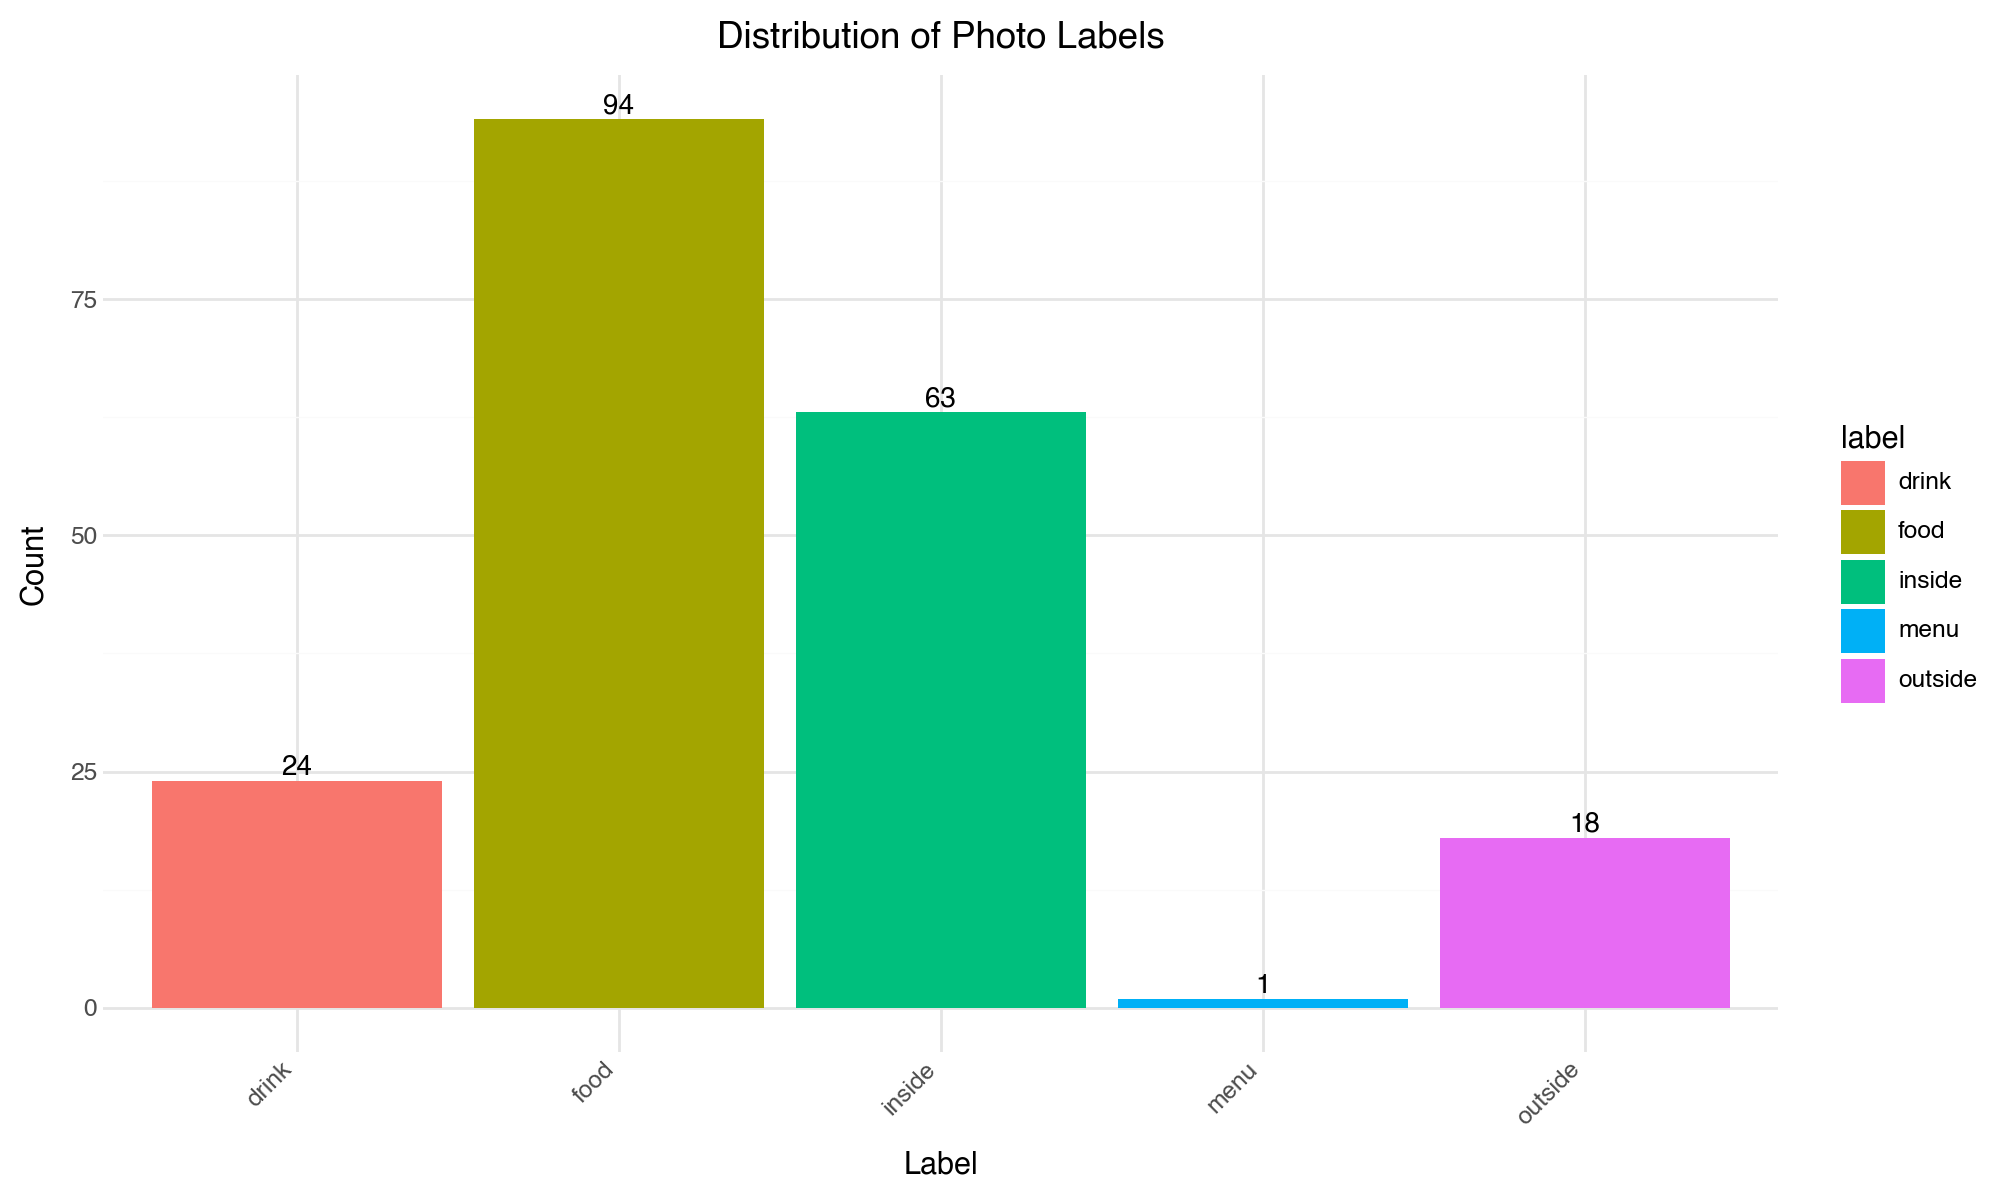

In [4]:
# Count of photos by label
label_counts = df['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']

print("Label Distribution:")
print(label_counts)

# Bar plot of label distribution
(
    ggplot(label_counts, aes(x='label', y='count', fill='label')) +
    geom_bar(stat='identity') +
    geom_text(aes(label='count'), va='bottom', size=10) +
    labs(title='Distribution of Photo Labels', 
         x='Label', 
         y='Count') +
    theme_minimal() +
    theme(figure_size=(10, 6),
          axis_text_x=element_text(rotation=45, hjust=1))
)

## Business Rating Distribution

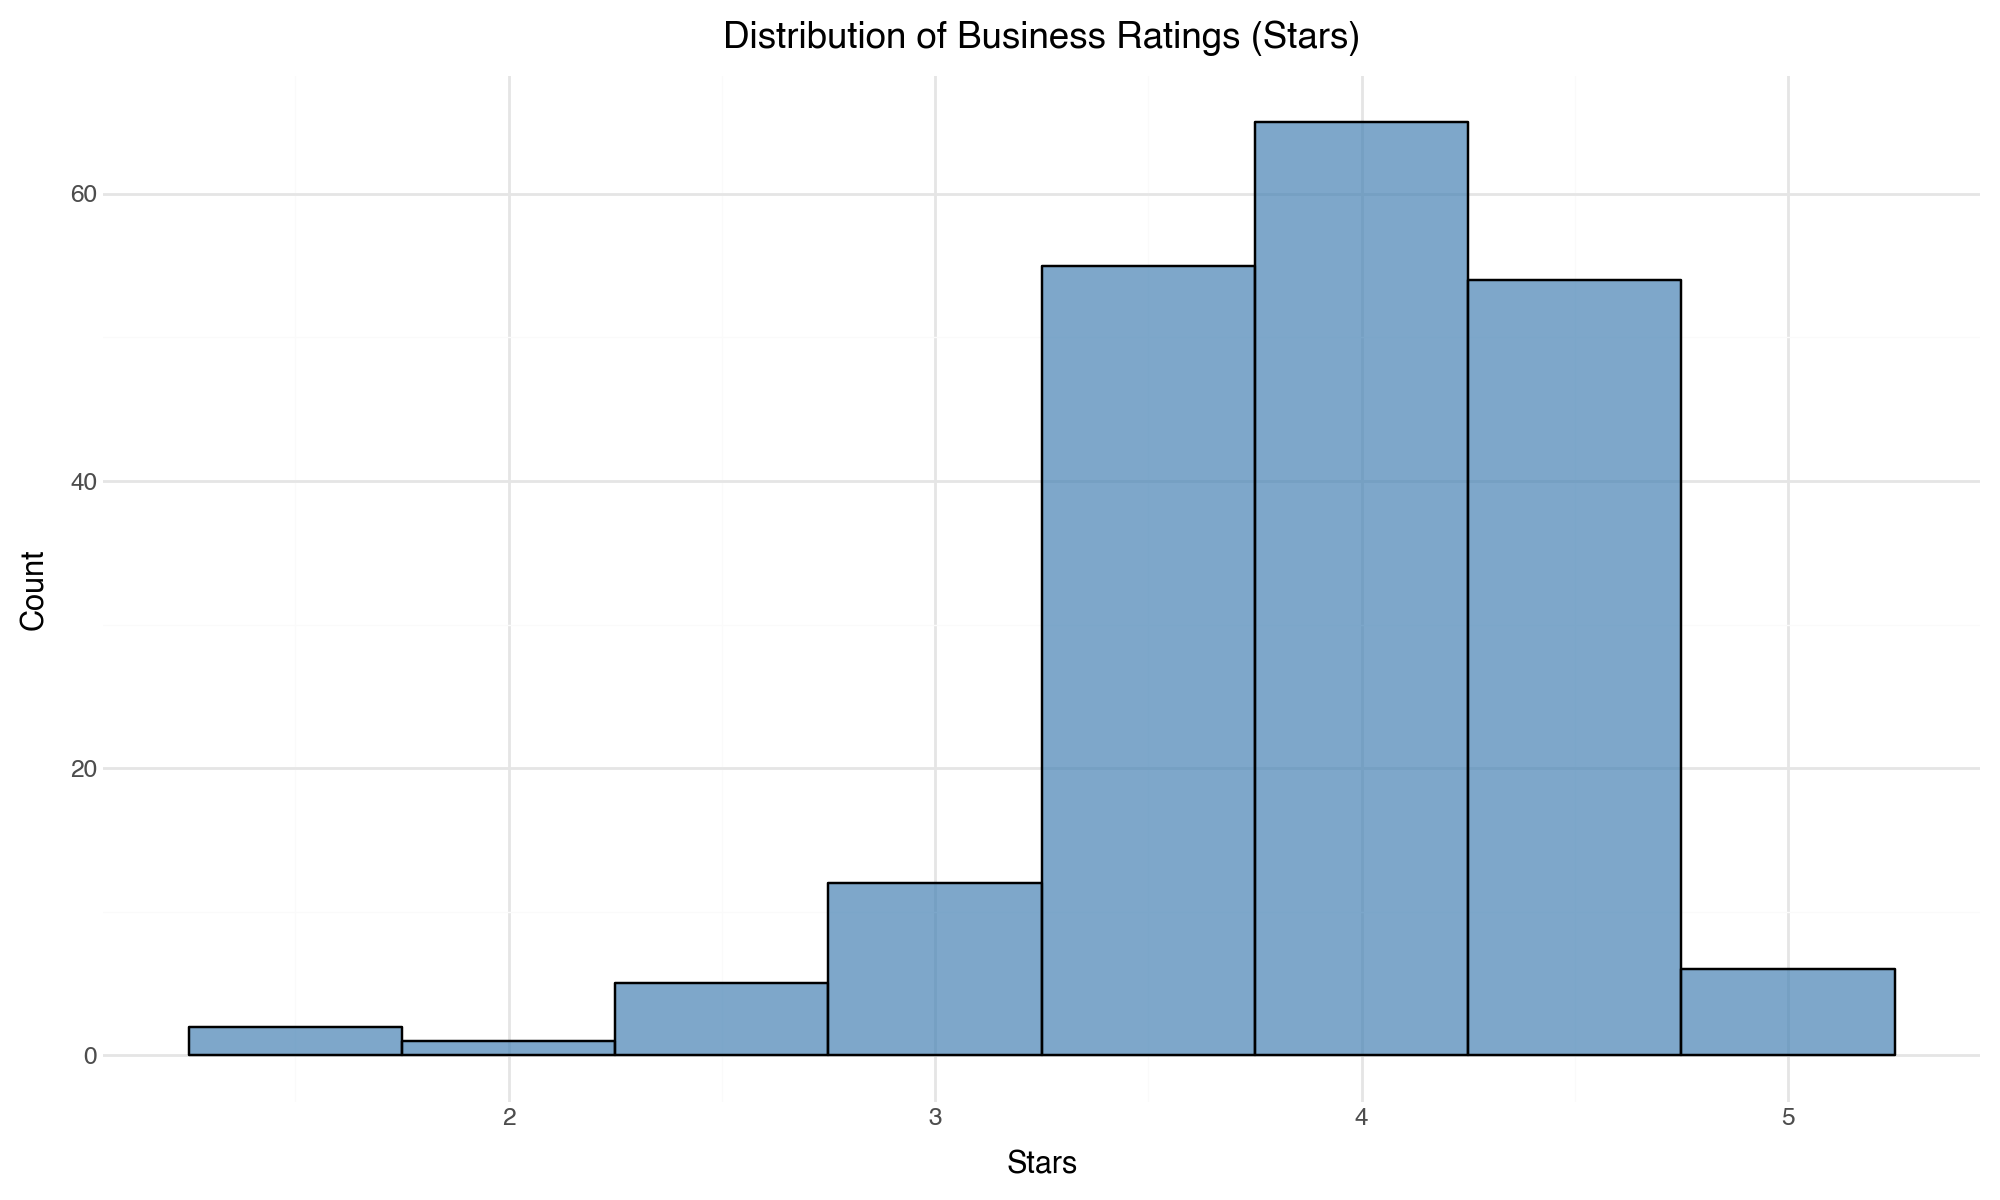

In [5]:
# Histogram of business stars
(
    ggplot(df, aes(x='stars')) +
    geom_histogram(binwidth=0.5, fill='steelblue', color='black', alpha=0.7) +
    labs(title='Distribution of Business Ratings (Stars)', 
         x='Stars', 
         y='Count') +
    theme_minimal() +
    theme(figure_size=(10, 6))
)

## Label Distribution by Star Rating

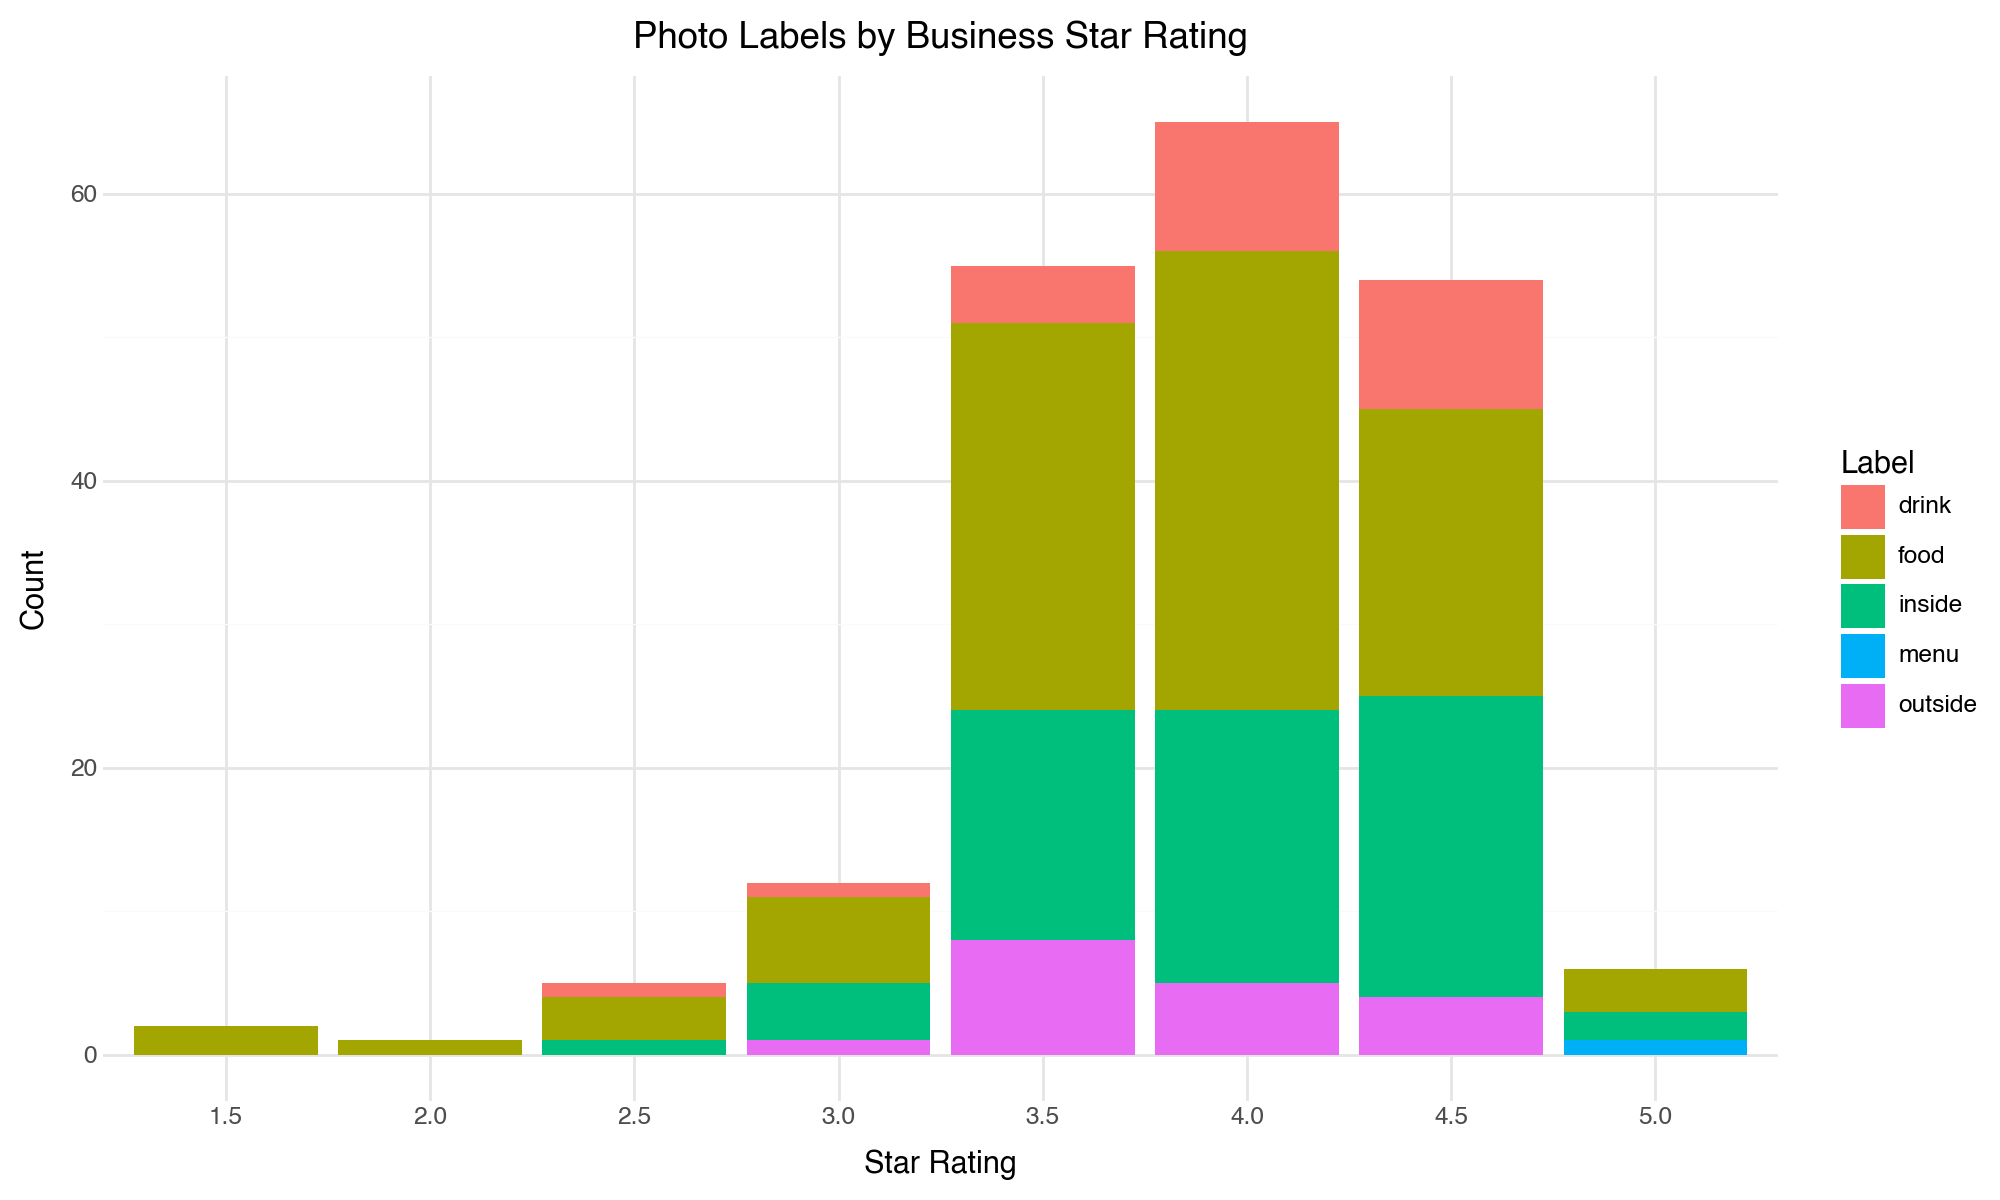

In [6]:
# Stacked bar chart: label by stars
(
    ggplot(df, aes(x='factor(stars)', fill='label')) +
    geom_bar(position='stack') +
    labs(title='Photo Labels by Business Star Rating', 
         x='Star Rating', 
         y='Count',
         fill='Label') +
    theme_minimal() +
    theme(figure_size=(10, 6))
)

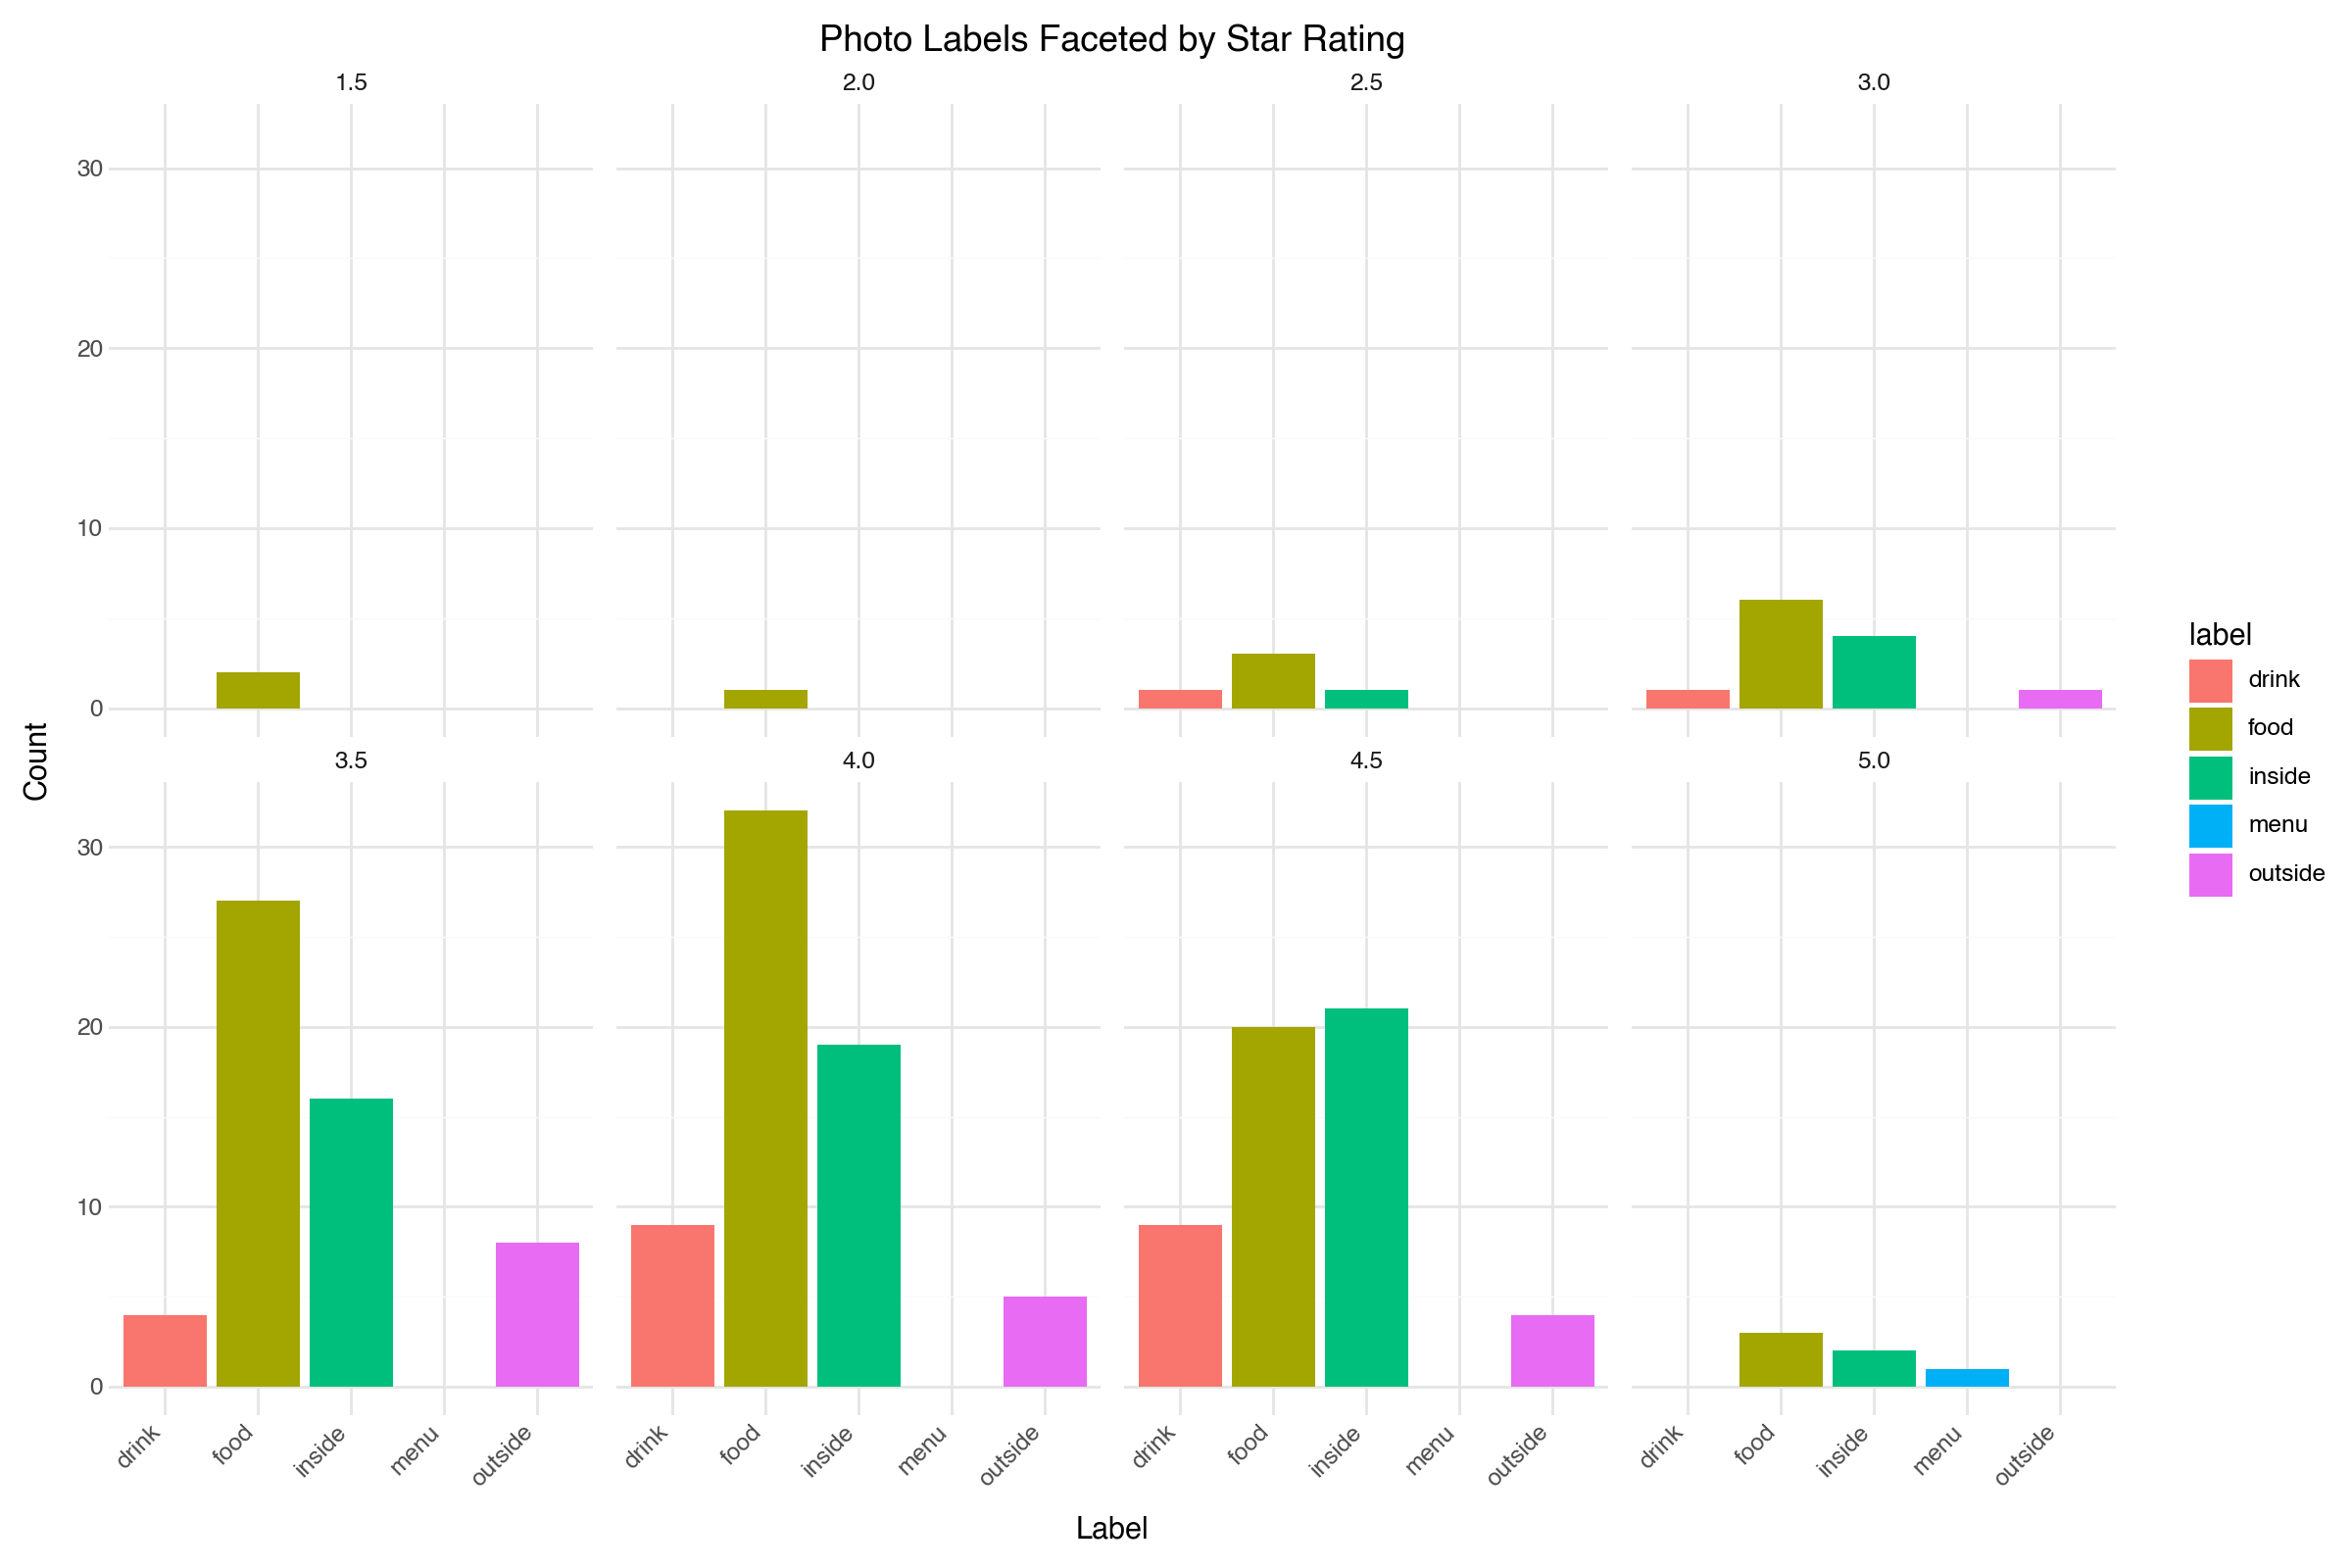

In [7]:
# Faceted bar chart: label distribution across different star ratings
(
    ggplot(df, aes(x='label', fill='label')) +
    geom_bar() +
    facet_wrap('~stars', nrow=2) +
    labs(title='Photo Labels Faceted by Star Rating', 
         x='Label', 
         y='Count') +
    theme_minimal() +
    theme(figure_size=(12, 8),
          axis_text_x=element_text(rotation=45, hjust=1))
)

## Geographic Distribution

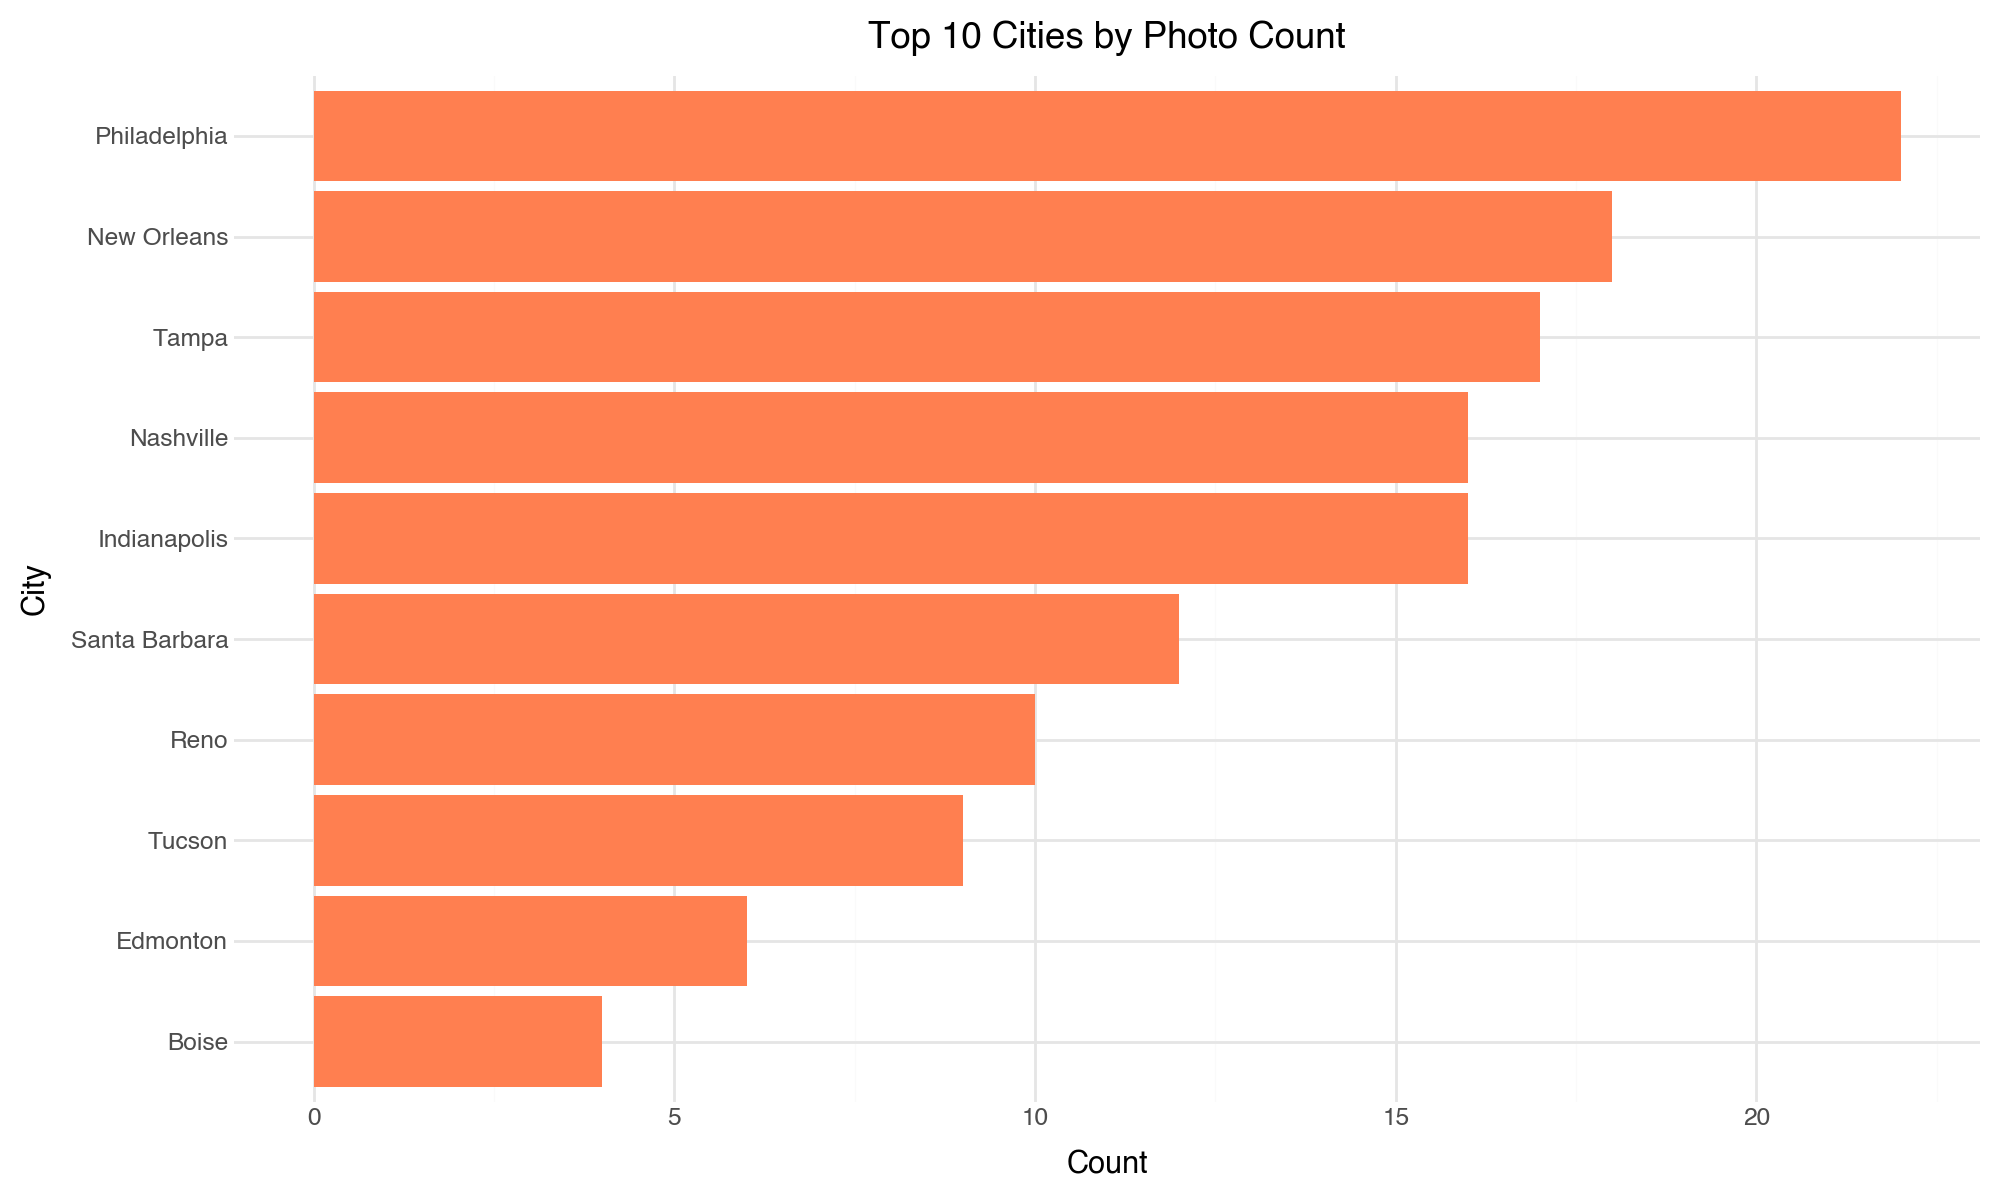

In [8]:
# Top cities by photo count
city_counts = df['city'].value_counts().head(10).reset_index()
city_counts.columns = ['city', 'count']

(
    ggplot(city_counts, aes(x='reorder(city, count)', y='count')) +
    geom_bar(stat='identity', fill='coral') +
    coord_flip() +
    labs(title='Top 10 Cities by Photo Count', 
         x='City', 
         y='Count') +
    theme_minimal() +
    theme(figure_size=(10, 6))
)

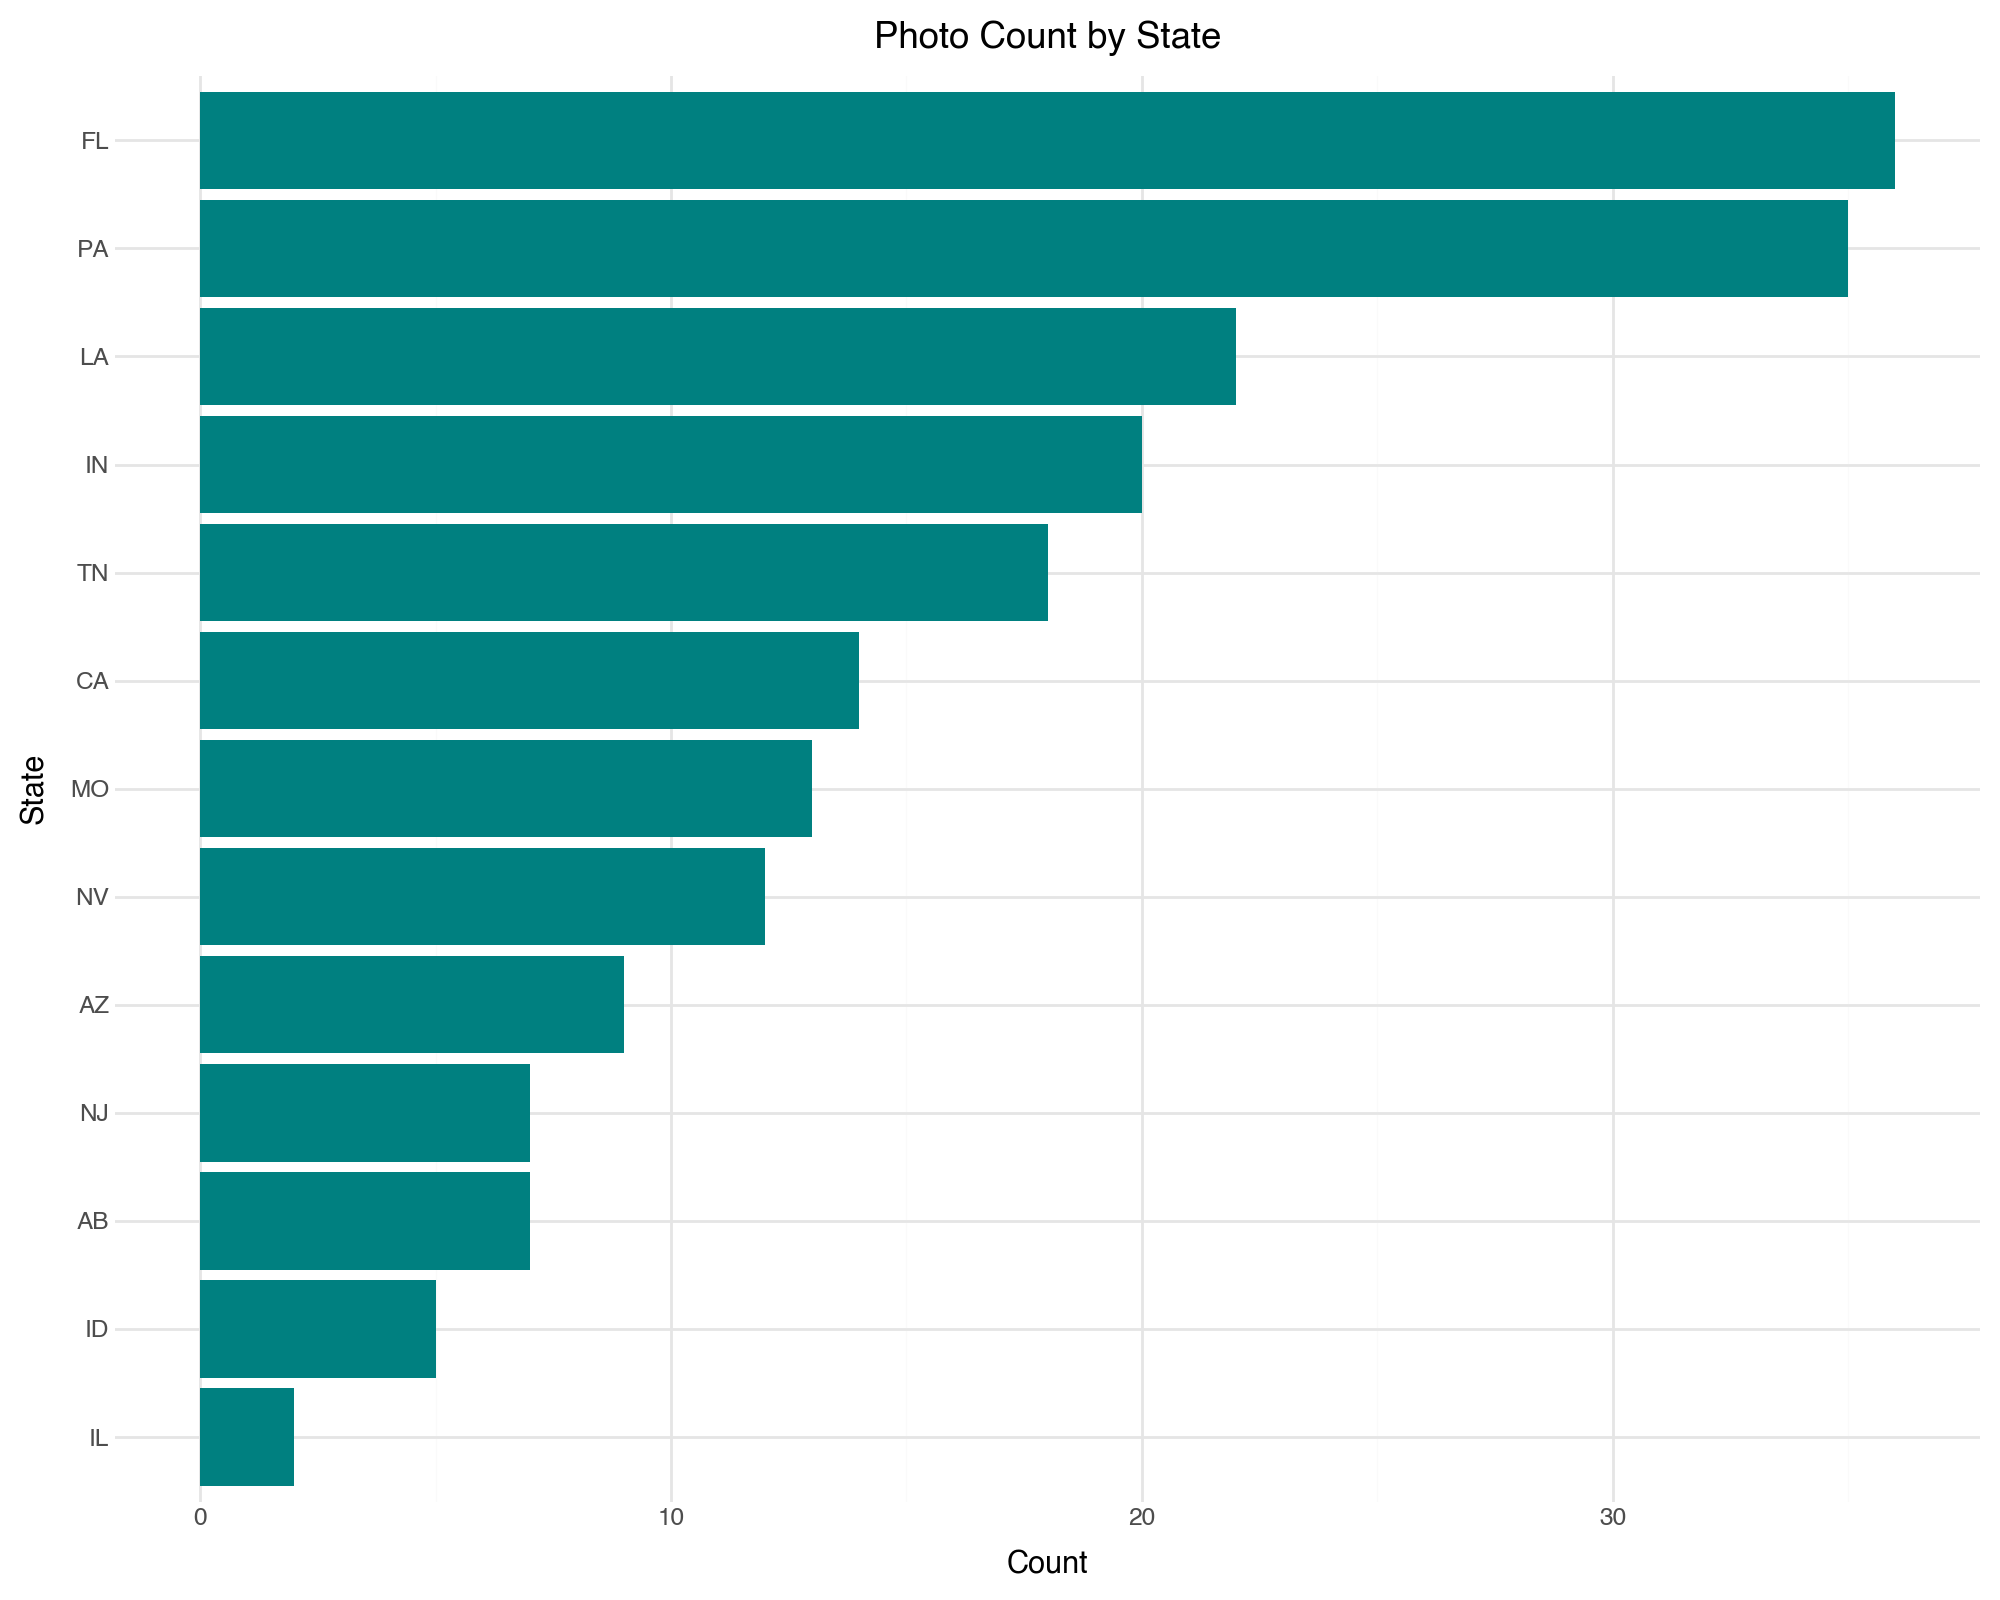

In [9]:
# State distribution
state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']

(
    ggplot(state_counts, aes(x='reorder(state, count)', y='count')) +
    geom_bar(stat='identity', fill='teal') +
    coord_flip() +
    labs(title='Photo Count by State', 
         x='State', 
         y='Count') +
    theme_minimal() +
    theme(figure_size=(10, 8))
)

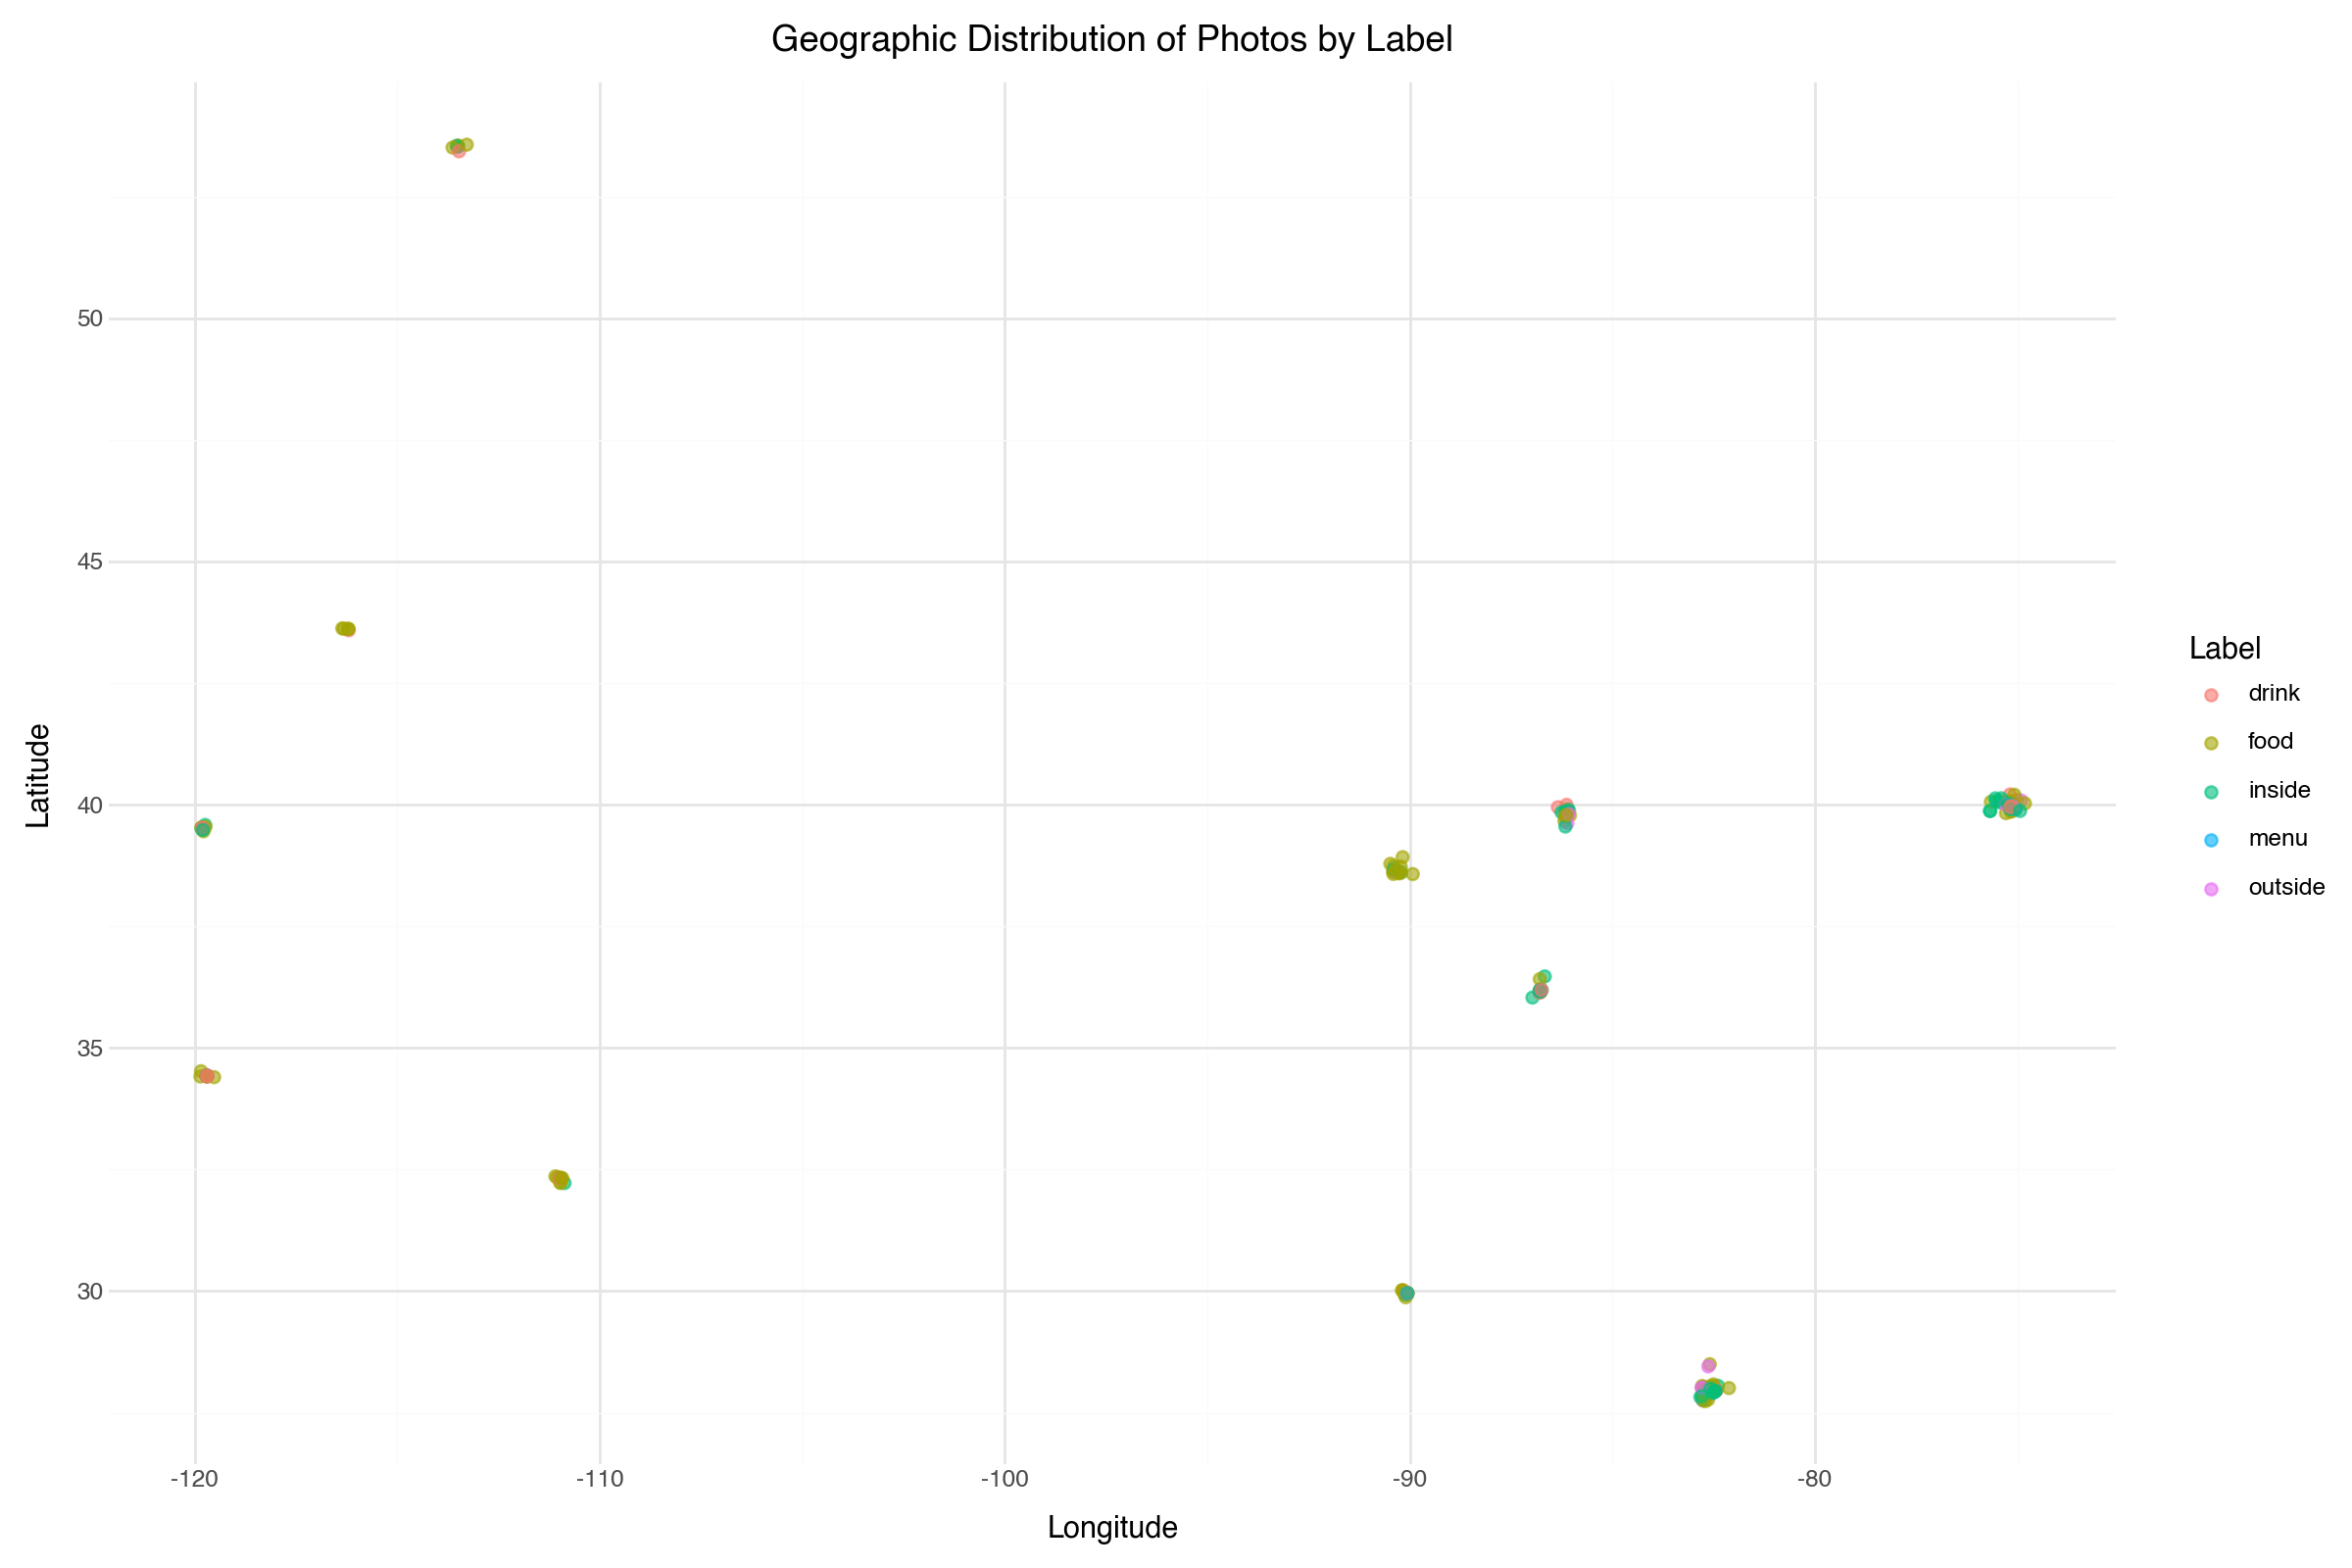

In [10]:
# Scatter plot: geographic coordinates with labels
(
    ggplot(df, aes(x='longitude', y='latitude', color='label')) +
    geom_point(alpha=0.6, size=2) +
    labs(title='Geographic Distribution of Photos by Label', 
         x='Longitude', 
         y='Latitude',
         color='Label') +
    theme_minimal() +
    theme(figure_size=(12, 8))
)

## Review Count Analysis

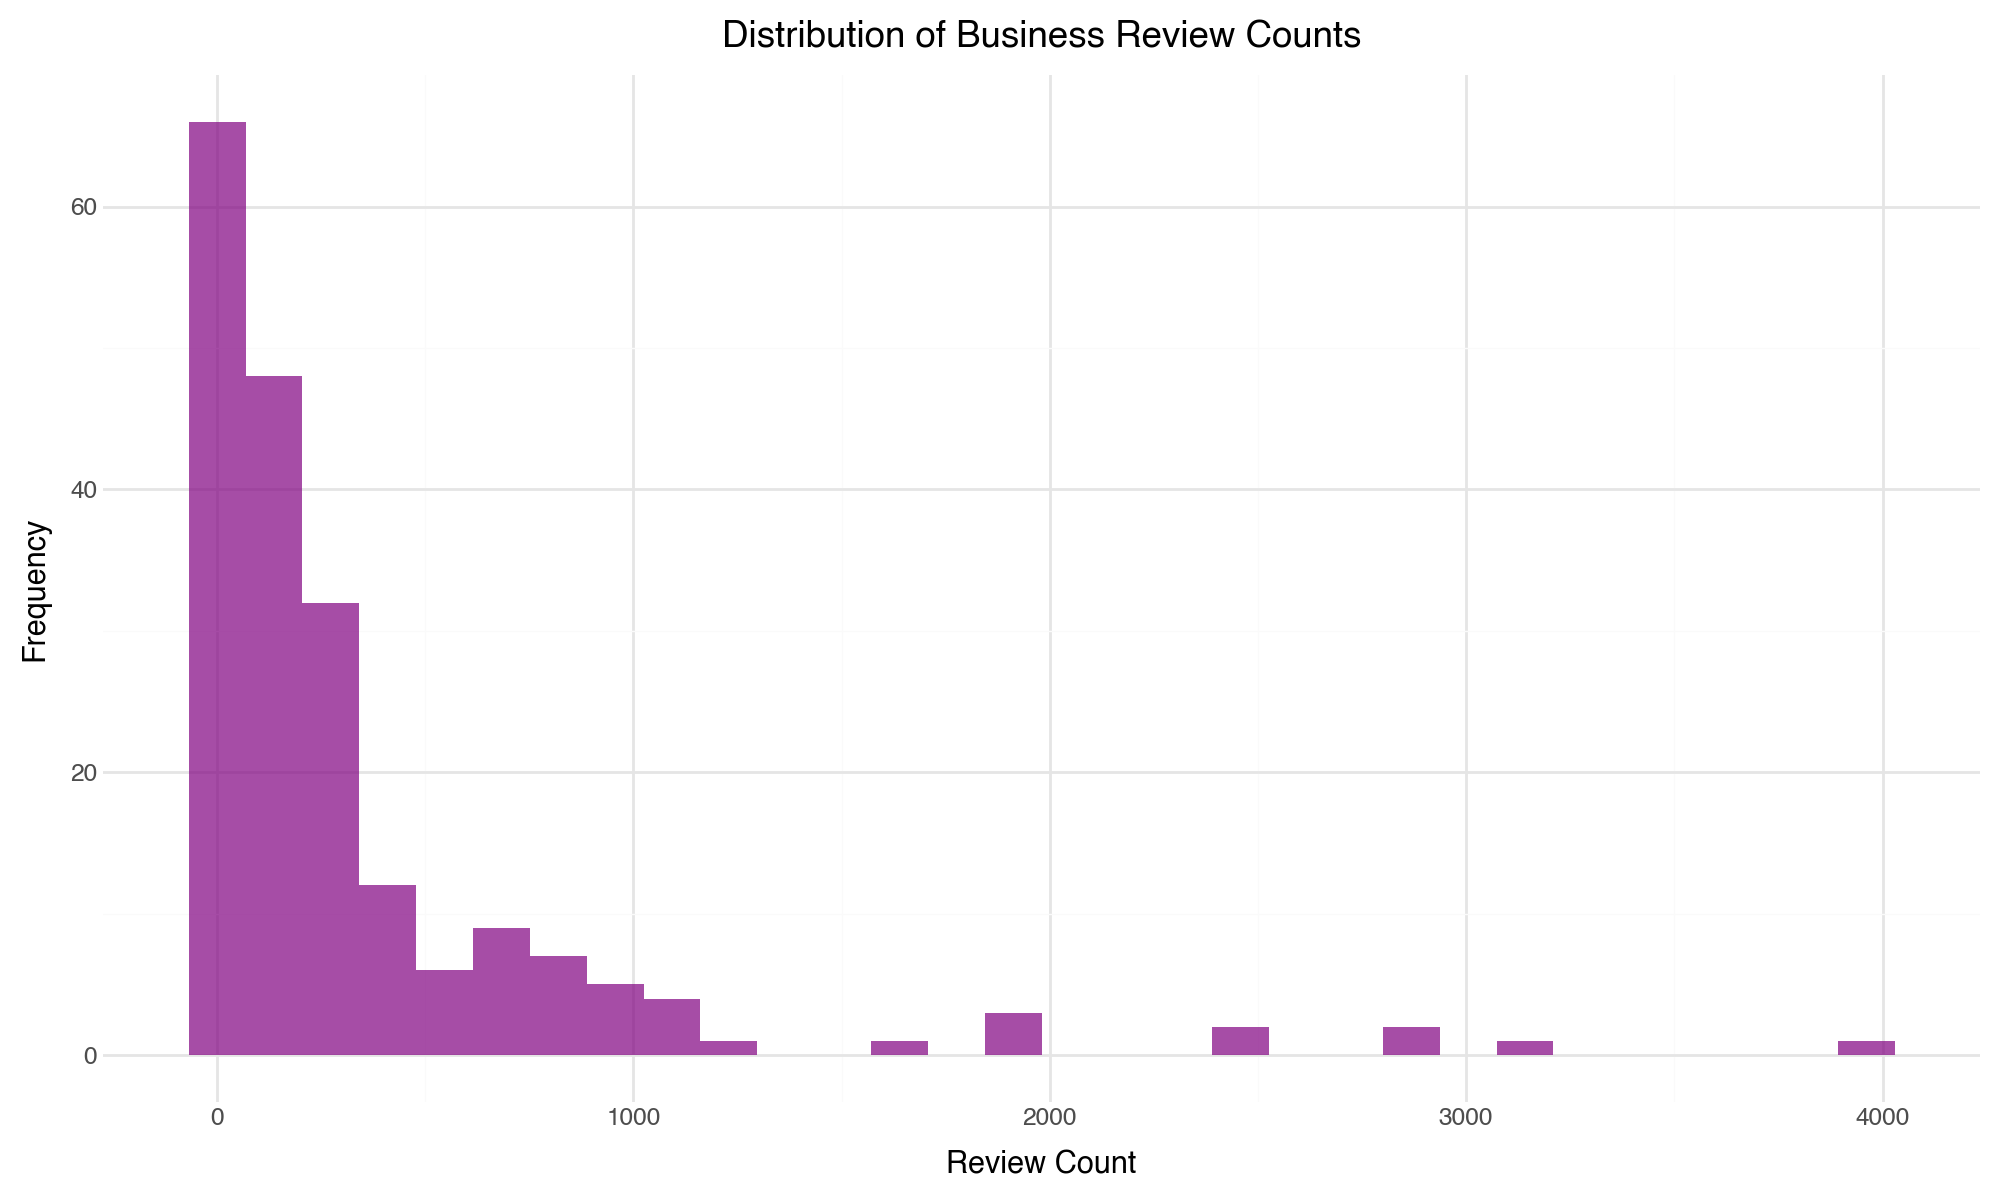

In [11]:
# Distribution of review counts
(
    ggplot(df, aes(x='review_count')) +
    geom_histogram(bins=30, fill='purple', alpha=0.7) +
    labs(title='Distribution of Business Review Counts', 
         x='Review Count', 
         y='Frequency') +
    theme_minimal() +
    theme(figure_size=(10, 6))
)

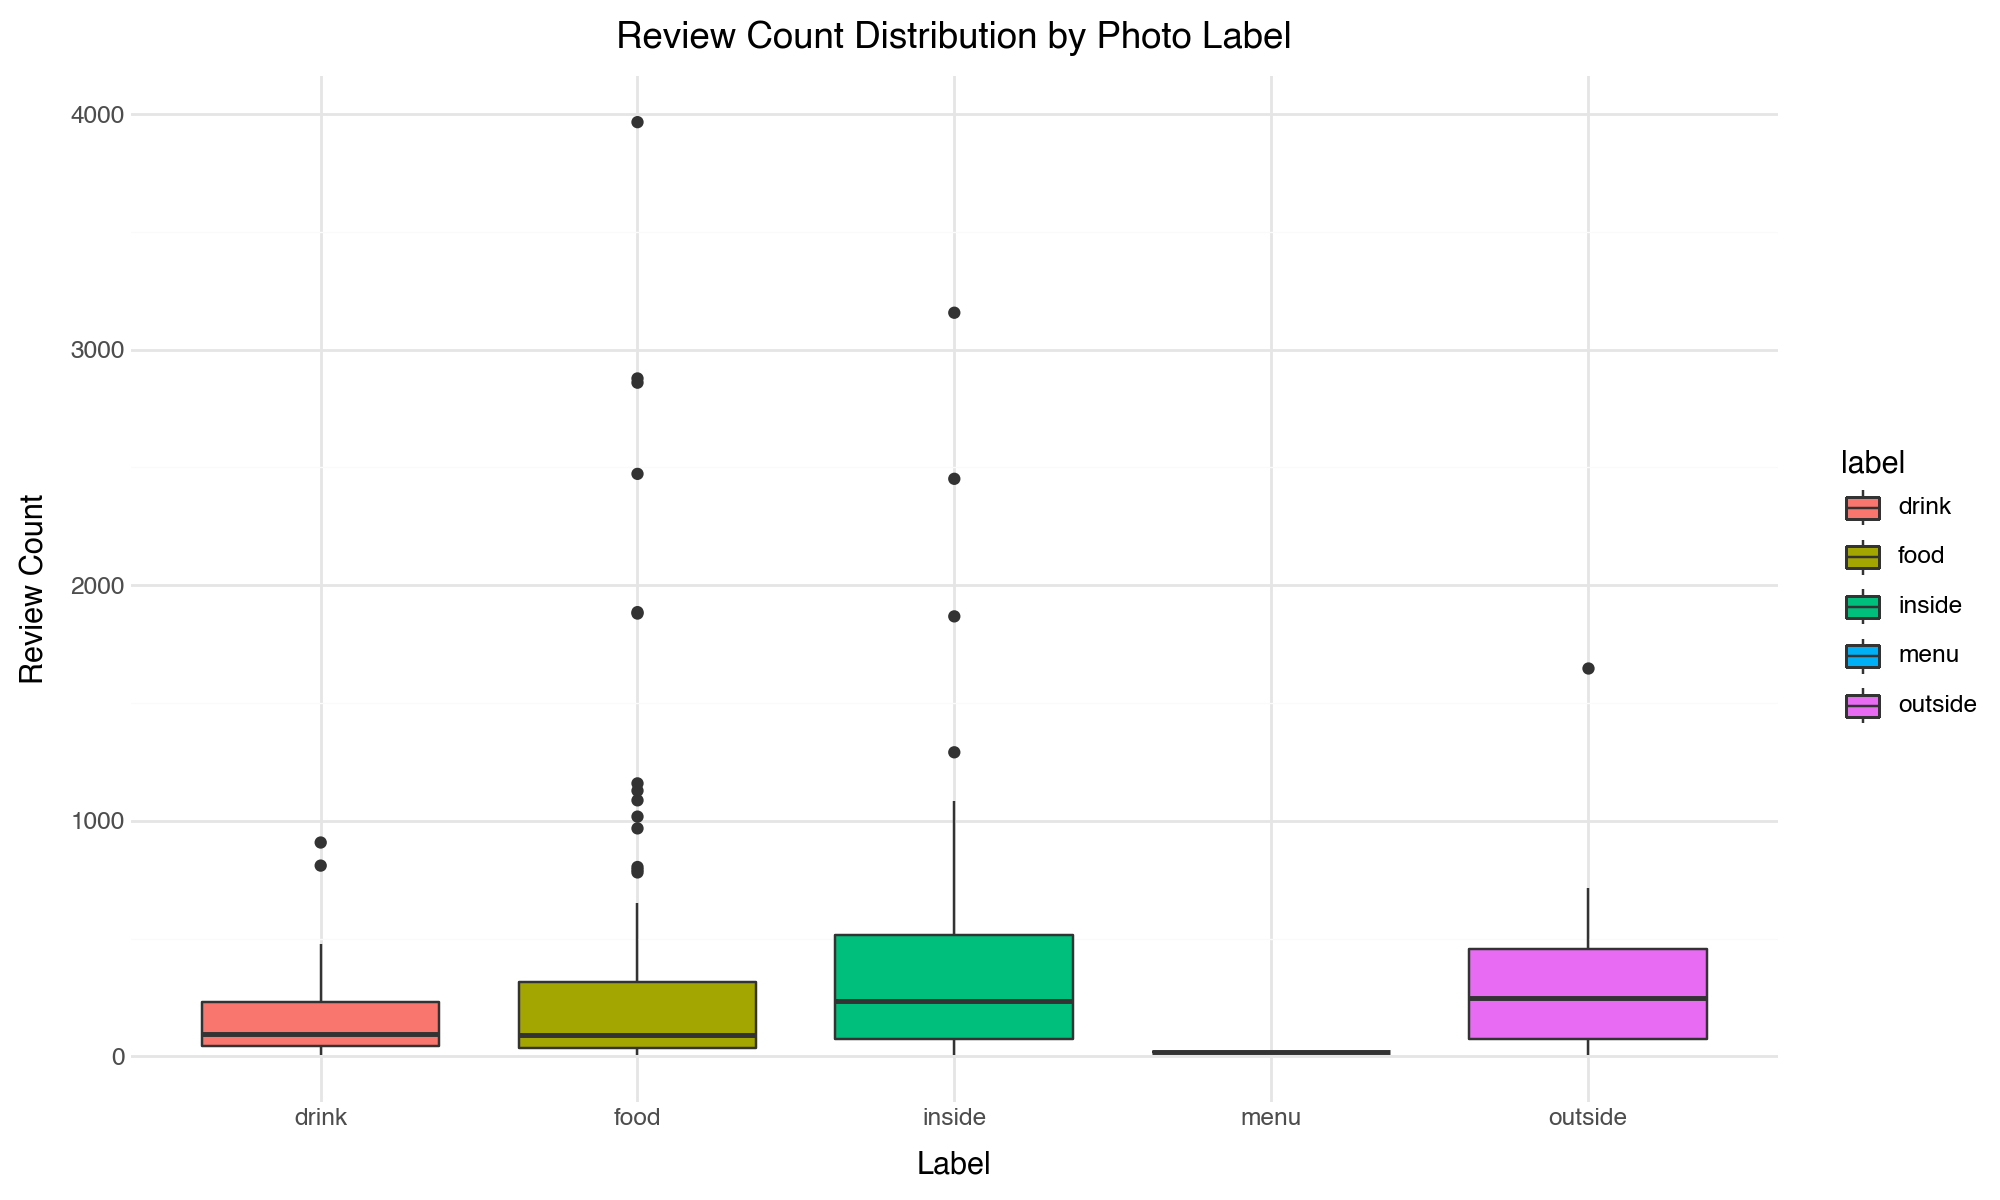

In [12]:
# Box plot: review count by label
(
    ggplot(df, aes(x='label', y='review_count', fill='label')) +
    geom_boxplot() +
    labs(title='Review Count Distribution by Photo Label', 
         x='Label', 
         y='Review Count') +
    theme_minimal() +
    theme(figure_size=(10, 6))
)

## Caption Analysis

In [13]:
# Caption availability
df['has_caption'] = df['caption'].notna() & (df['caption'].str.strip() != '')

caption_stats = df.groupby('has_caption').size().reset_index(name='count')
caption_stats['has_caption'] = caption_stats['has_caption'].map({True: 'With Caption', False: 'No Caption'})

print("Caption Availability:")
print(caption_stats)
print(f"\nPercentage with captions: {(df['has_caption'].sum() / len(df) * 100):.1f}%")

Caption Availability:
    has_caption  count
0    No Caption    101
1  With Caption     99

Percentage with captions: 49.5%


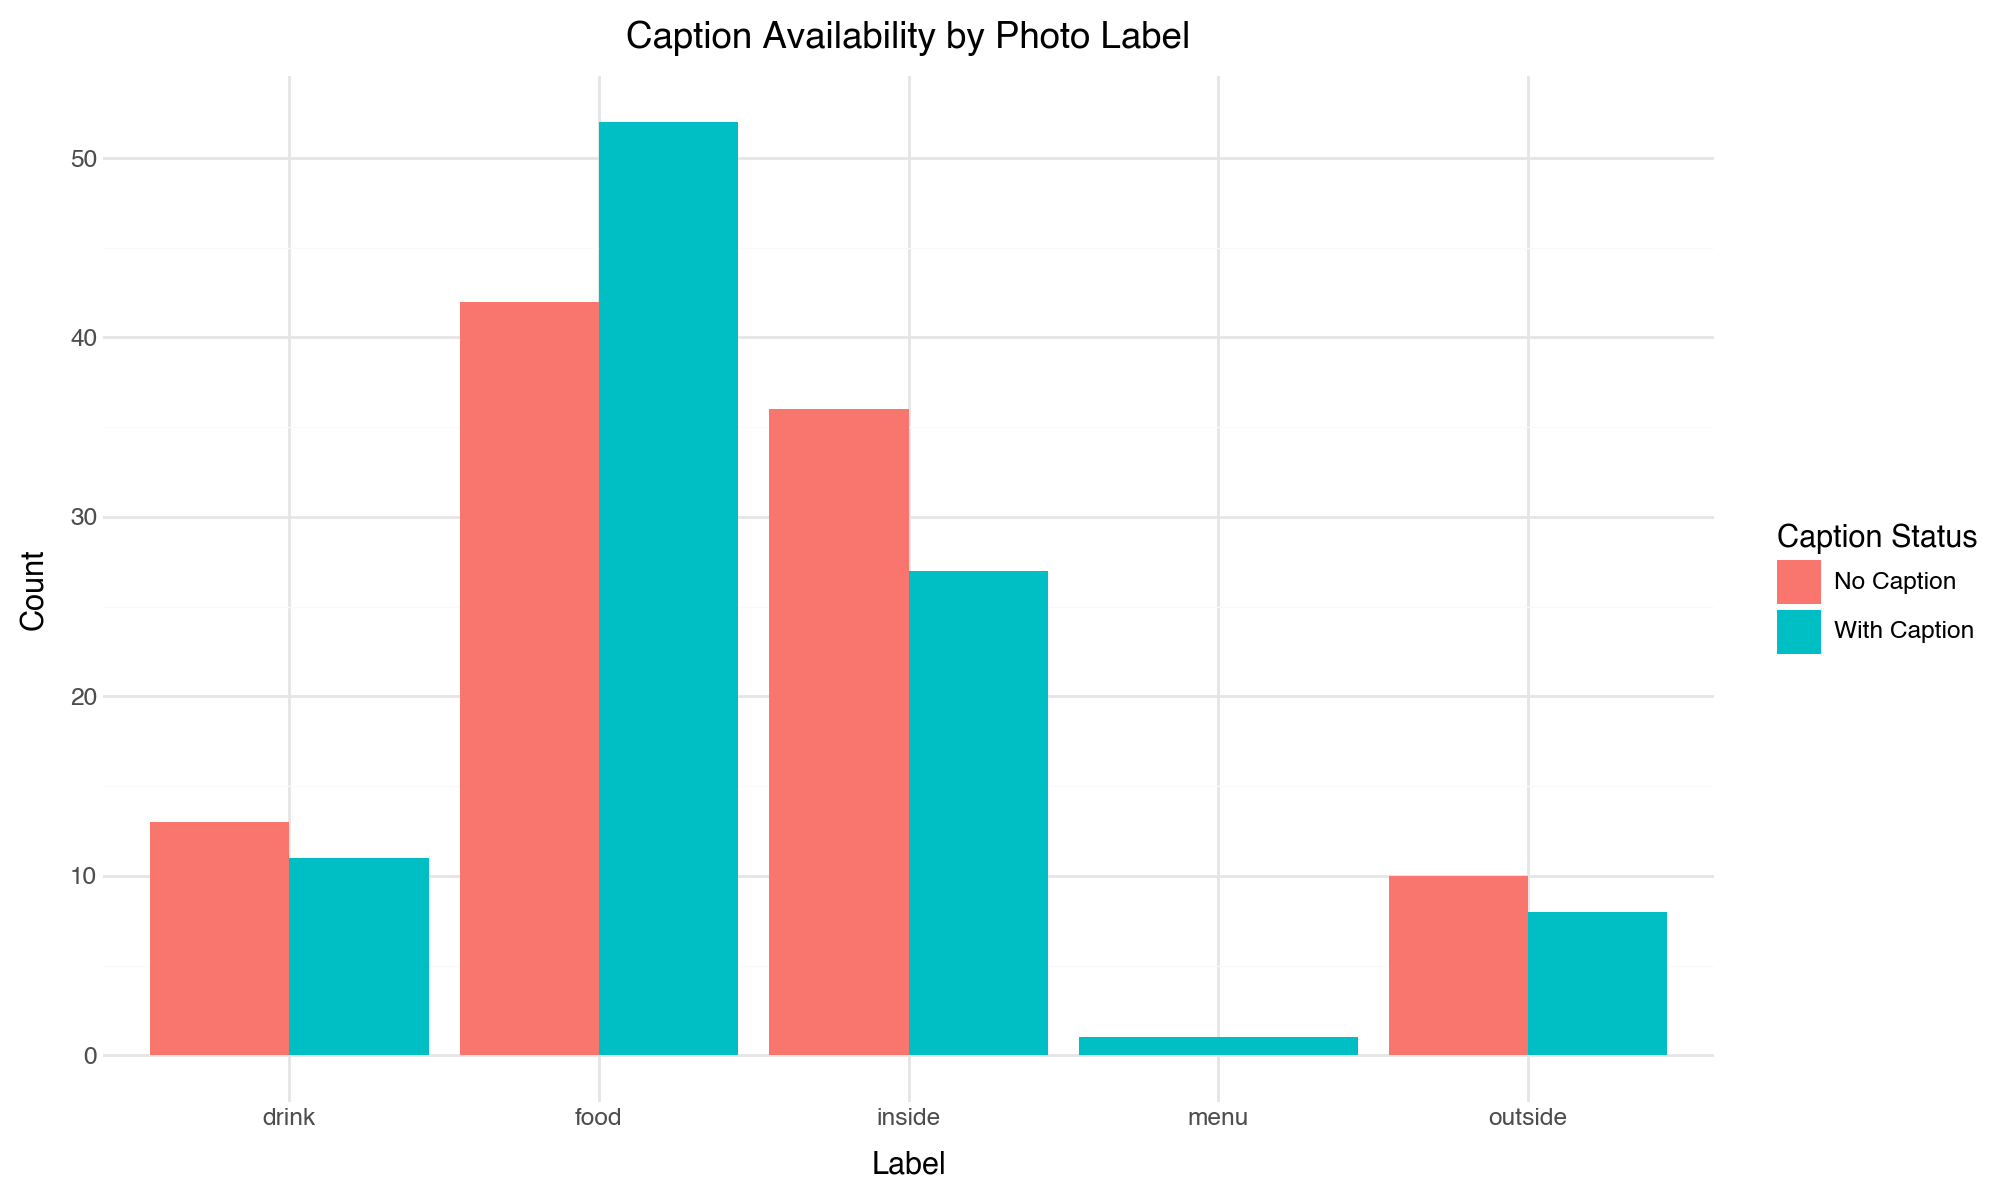

In [15]:
# Caption availability by label
caption_by_label = df.groupby(['label', 'has_caption']).size().reset_index(name='count')
caption_by_label['has_caption'] = caption_by_label['has_caption'].map({True: 'With Caption', False: 'No Caption'})

(
    ggplot(caption_by_label, aes(x='label', y='count', fill='has_caption')) +
    geom_bar(stat='identity', position='dodge') +
    labs(title='Caption Availability by Photo Label', 
         x='Label', 
         y='Count',
         fill='Caption Status') +
    theme_minimal() +
    theme(figure_size=(10, 6))
)

Caption Length Statistics:
count     99.000000
mean      28.535354
std       25.121872
min        3.000000
25%       12.000000
50%       20.000000
75%       34.500000
max      120.000000
Name: caption_length, dtype: float64


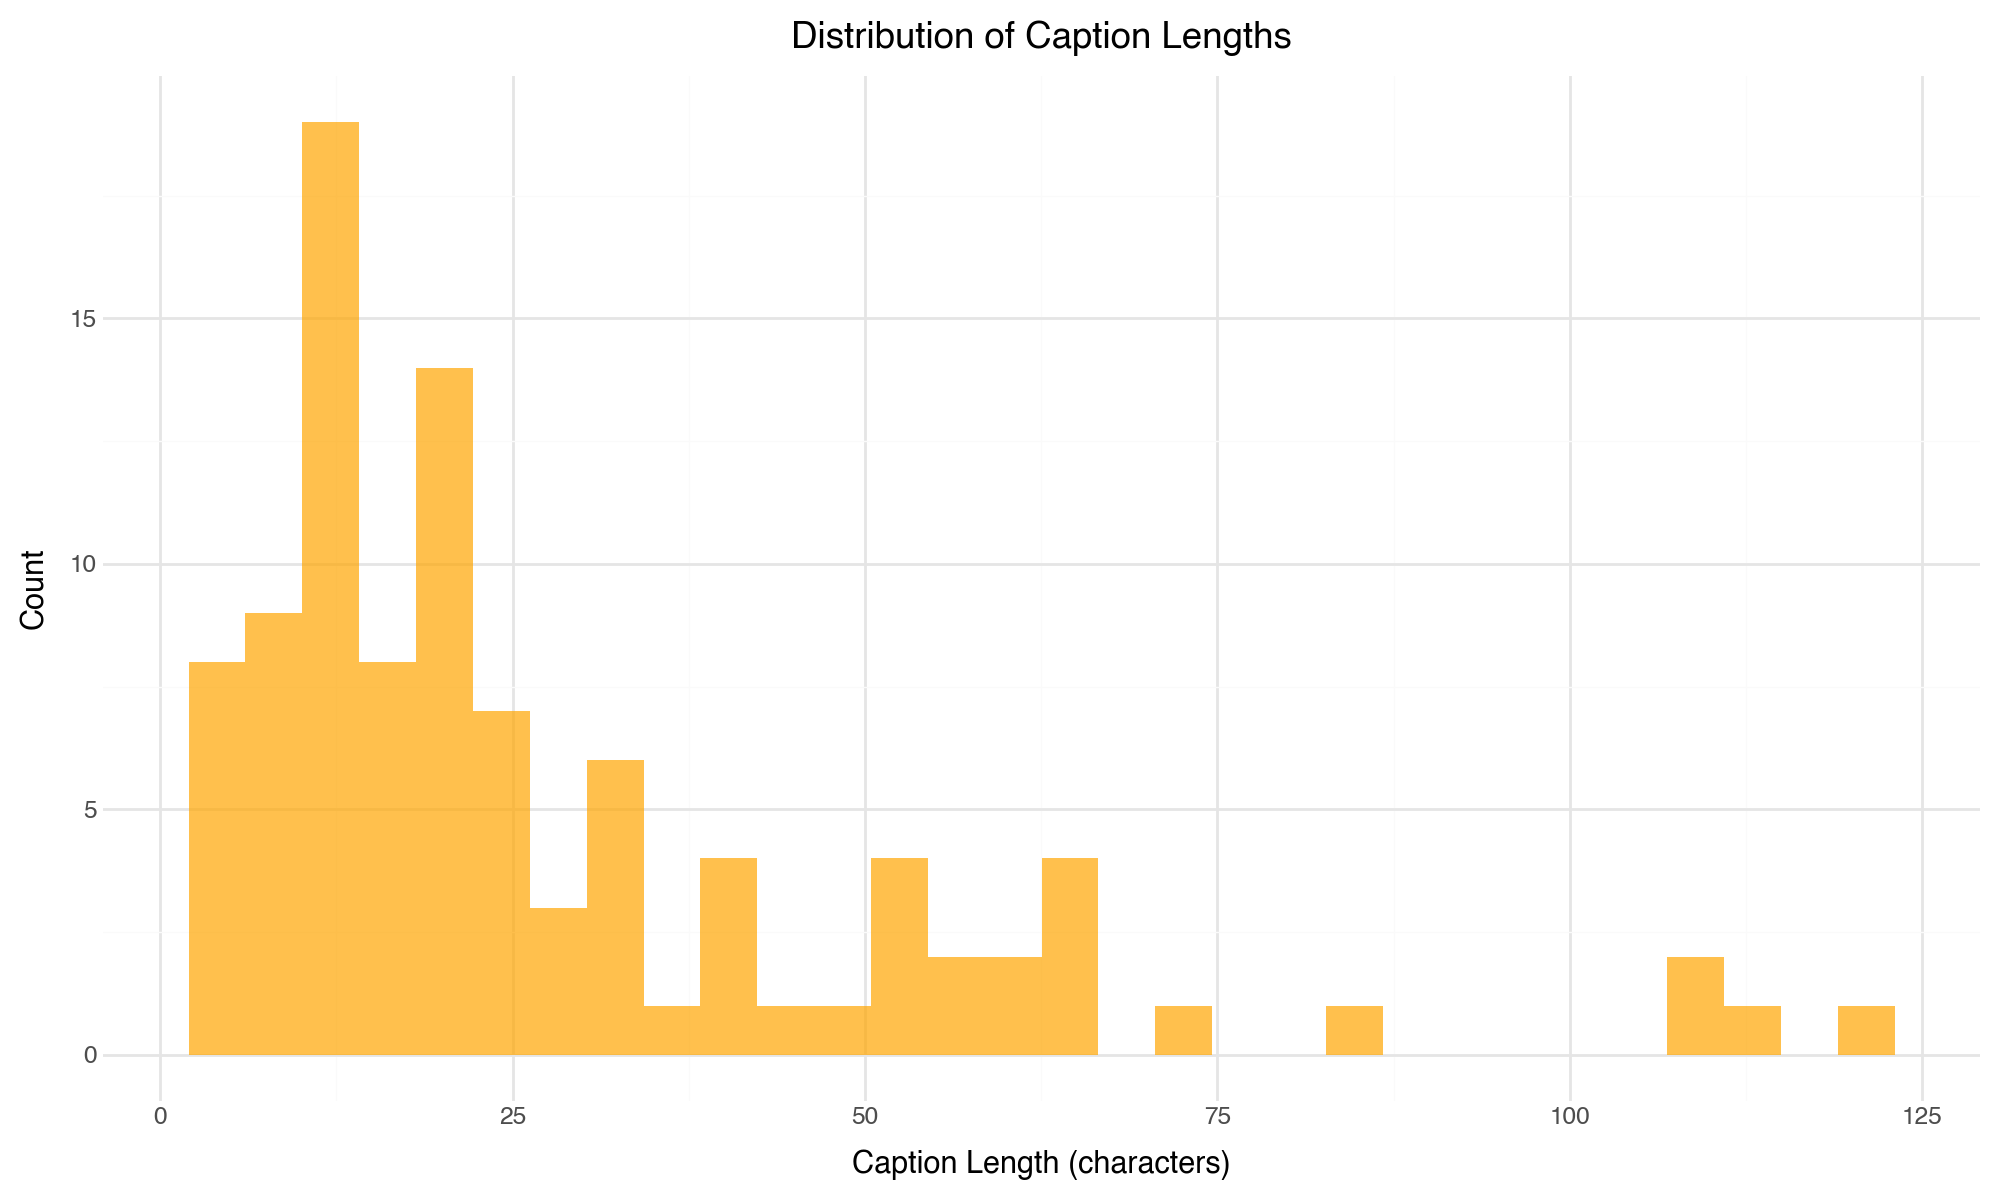

In [16]:
# Caption length analysis (for photos with captions)
df_with_captions = df[df['has_caption']].copy()
df_with_captions['caption_length'] = df_with_captions['caption'].str.len()

print("Caption Length Statistics:")
print(df_with_captions['caption_length'].describe())

# Distribution of caption lengths
(
    ggplot(df_with_captions, aes(x='caption_length')) +
    geom_histogram(bins=30, fill='orange', alpha=0.7) +
    labs(title='Distribution of Caption Lengths', 
         x='Caption Length (characters)', 
         y='Count') +
    theme_minimal() +
    theme(figure_size=(10, 6))
)

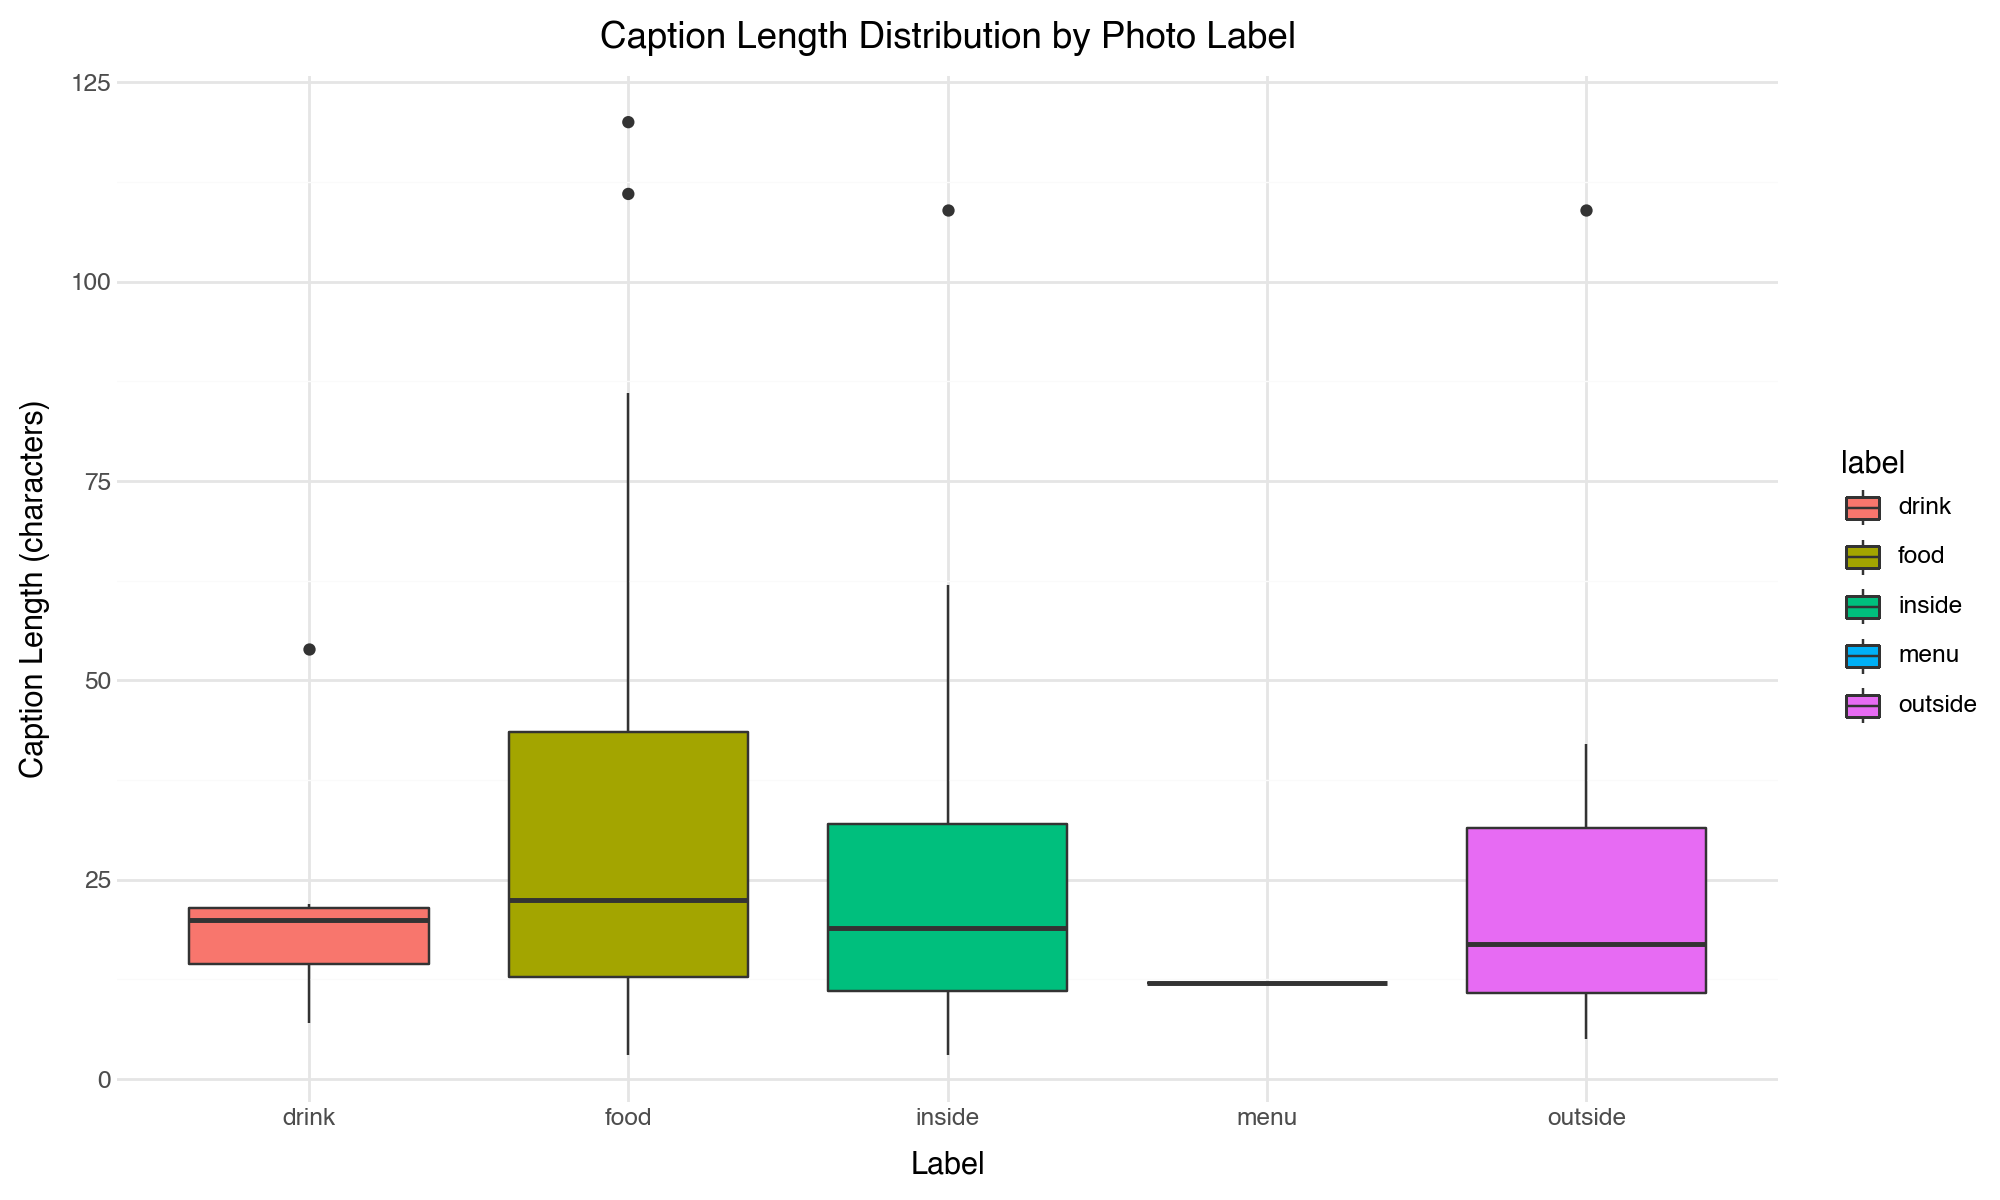

In [17]:
# Box plot: caption length by label
(
    ggplot(df_with_captions, aes(x='label', y='caption_length', fill='label')) +
    geom_boxplot() +
    labs(title='Caption Length Distribution by Photo Label', 
         x='Label', 
         y='Caption Length (characters)') +
    theme_minimal() +
    theme(figure_size=(10, 6))
)


Word Count Statistics:
count    99.000000
mean      4.838384
std       4.546151
min       1.000000
25%       2.000000
50%       3.000000
75%       6.500000
max      24.000000
Name: word_count, dtype: float64


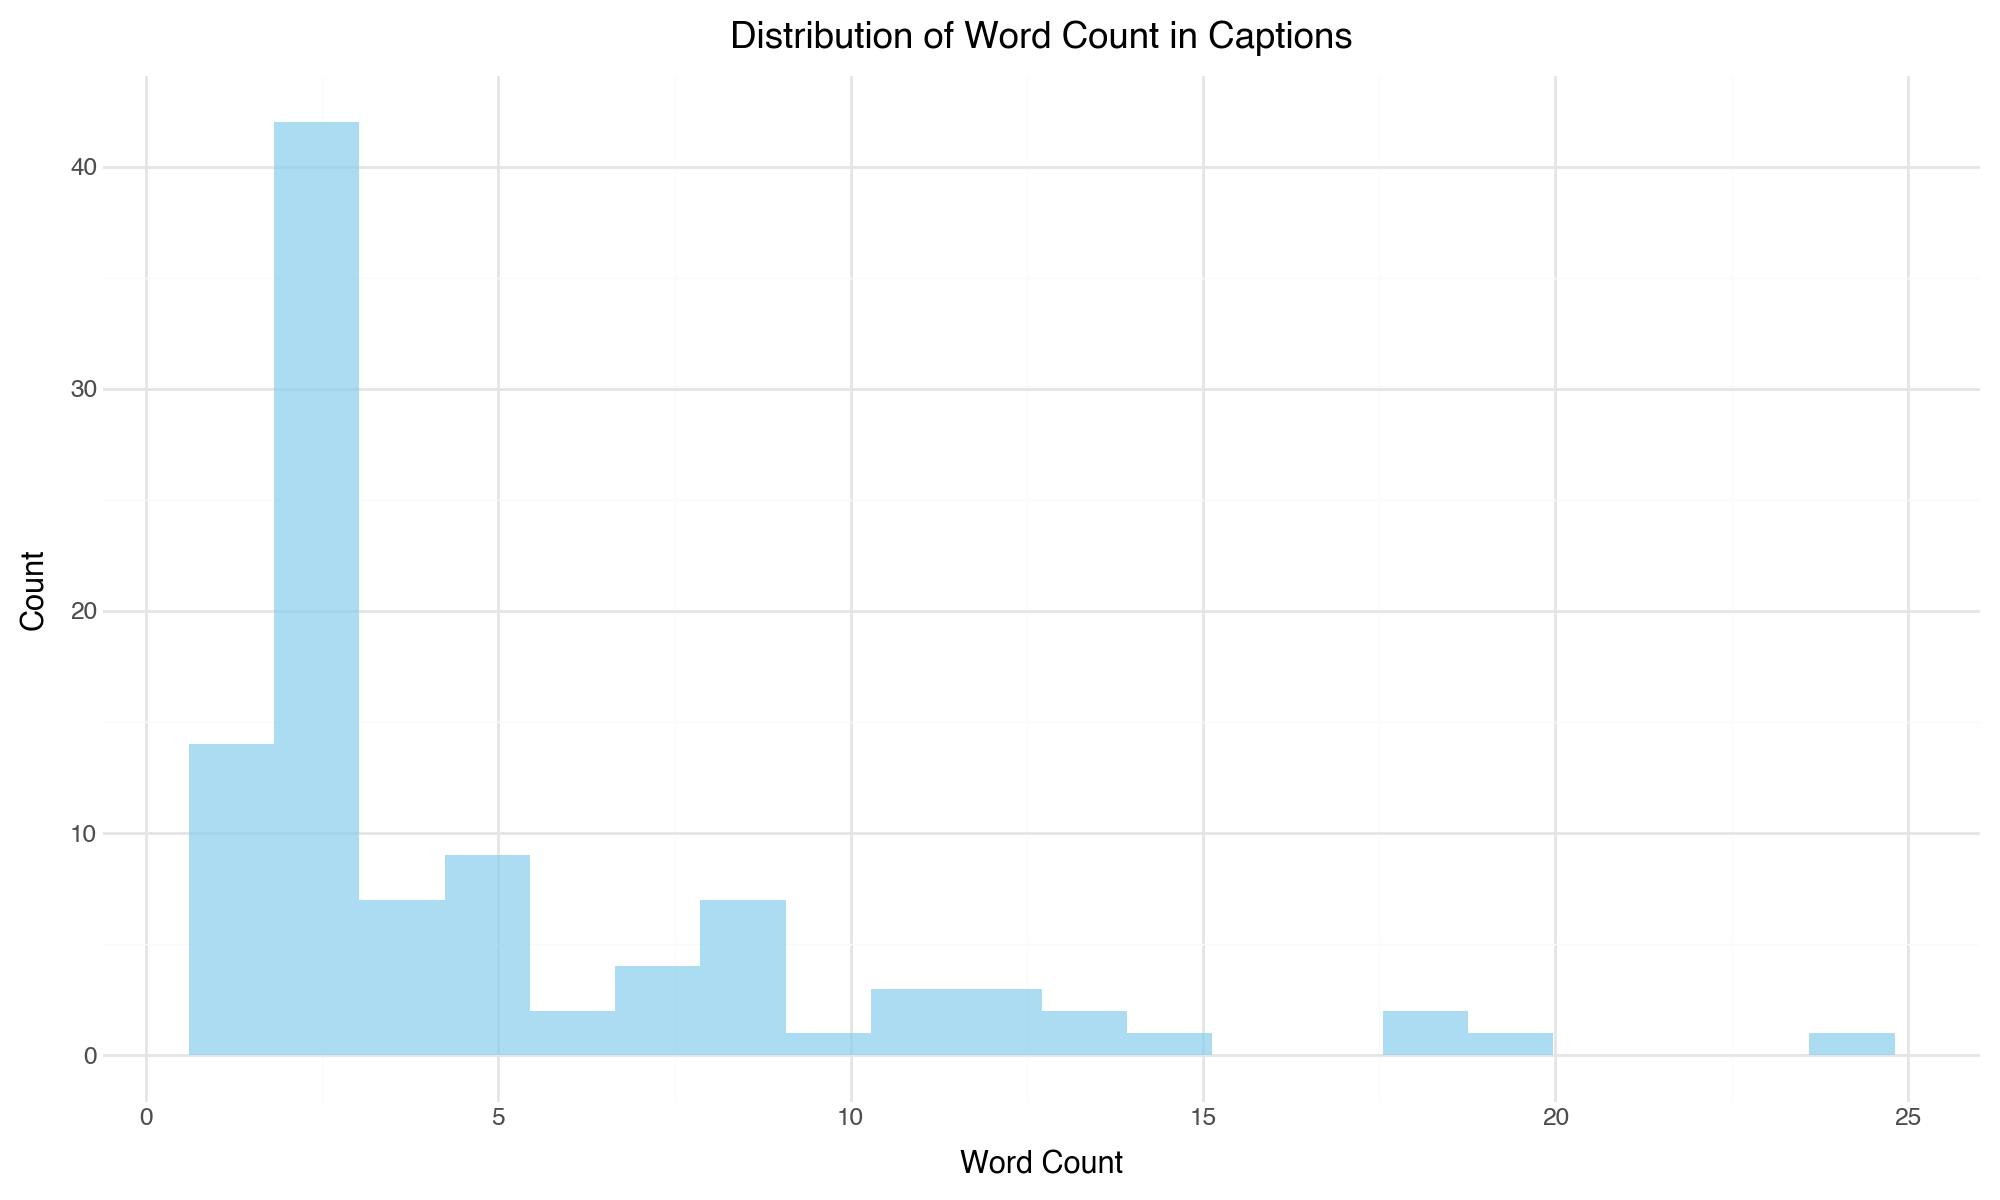

In [18]:
# Word count in captions
df_with_captions['word_count'] = df_with_captions['caption'].str.split().str.len()

print("\nWord Count Statistics:")
print(df_with_captions['word_count'].describe())

(
    ggplot(df_with_captions, aes(x='word_count')) +
    geom_histogram(bins=20, fill='skyblue', alpha=0.7) +
    labs(title='Distribution of Word Count in Captions', 
         x='Word Count', 
         y='Count') +
    theme_minimal() +
    theme(figure_size=(10, 6))
)

### Common Words in Captions

Top 20 Most Common Words in Captions:
       word  count
0       and     16
1        of      9
2       the      9
3        on      6
4      with      6
5         s      6
6         a      5
7        it      4
8        in      4
9   seafood      4
10  seating      4
11    great      3
12    salad      3
13    house      3
14      are      3
15    fried      3
16   shrimp      3
17    steak      3
18       at      3
19      not      3


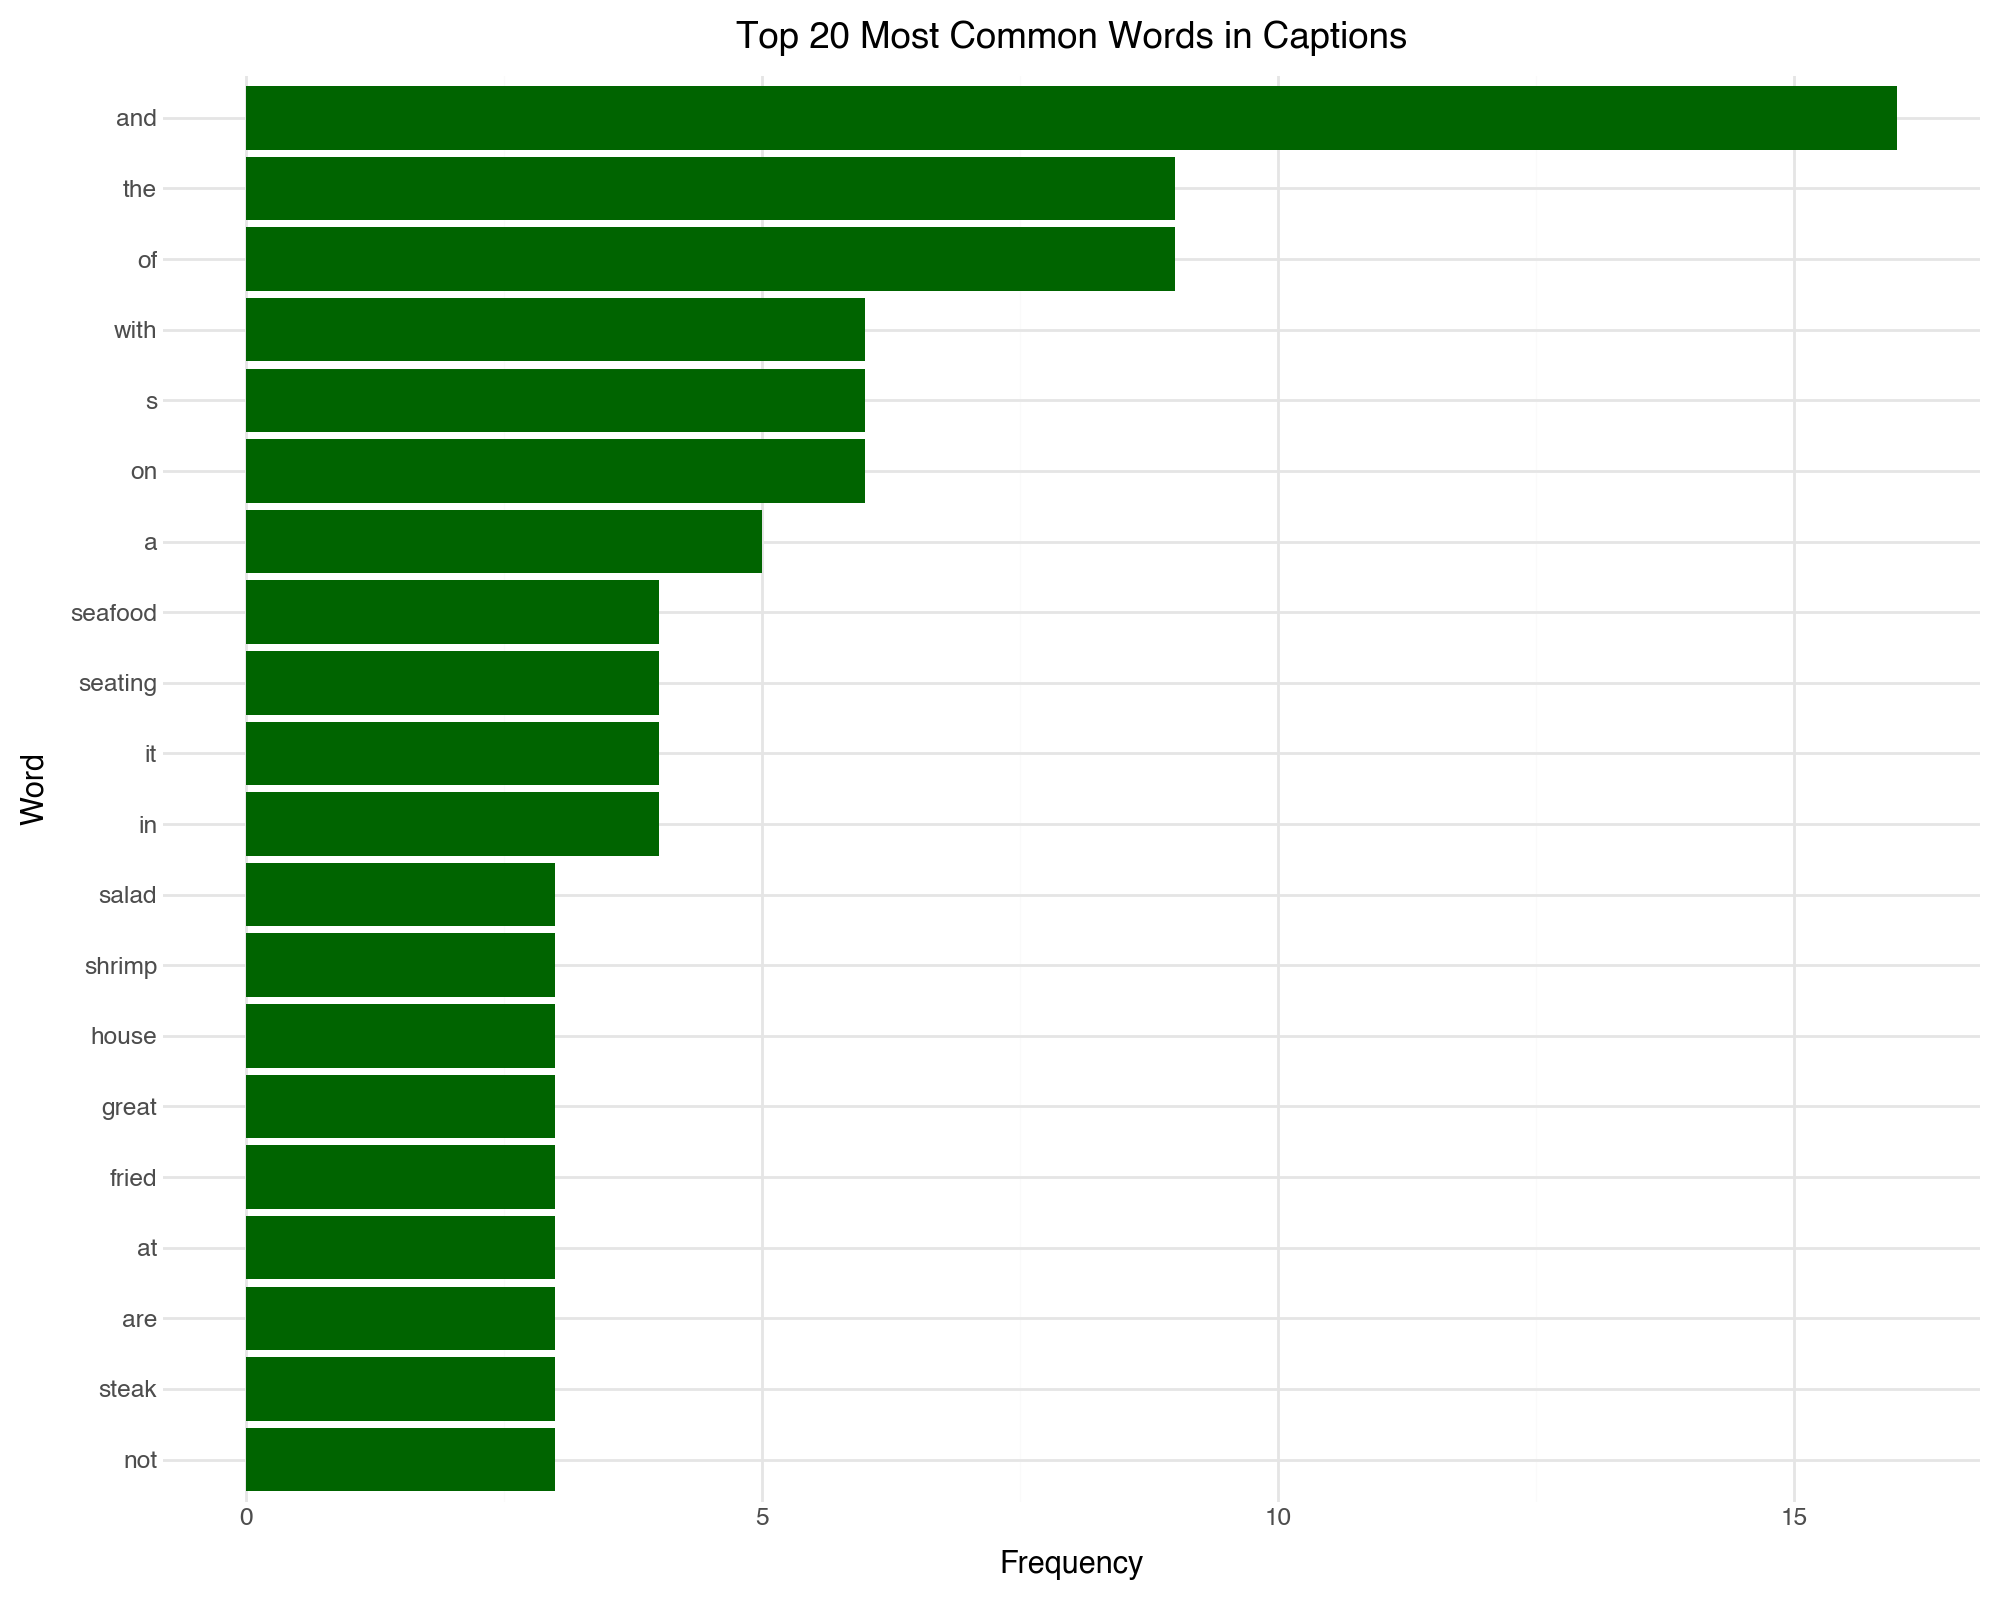

In [19]:
# Extract all words and count frequency
from collections import Counter
import re

all_words = []
for caption in df_with_captions['caption']:
    # Convert to lowercase and extract words
    words = re.findall(r'\b[a-z]+\b', caption.lower())
    all_words.extend(words)

# Get top 20 most common words
word_counts = Counter(all_words).most_common(20)
word_freq_df = pd.DataFrame(word_counts, columns=['word', 'count'])

print("Top 20 Most Common Words in Captions:")
print(word_freq_df)

# Bar plot of word frequencies
(
    ggplot(word_freq_df, aes(x='reorder(word, count)', y='count')) +
    geom_bar(stat='identity', fill='darkgreen') +
    coord_flip() +
    labs(title='Top 20 Most Common Words in Captions', 
         x='Word', 
         y='Frequency') +
    theme_minimal() +
    theme(figure_size=(10, 8))
)

In [20]:
# Top words by label
print("\nTop 10 Words by Label:\n")

for label in df['label'].unique():
    label_captions = df_with_captions[df_with_captions['label'] == label]['caption']
    label_words = []
    
    for caption in label_captions:
        words = re.findall(r'\b[a-z]+\b', caption.lower())
        label_words.extend(words)
    
    top_words = Counter(label_words).most_common(10)
    
    print(f"\n{label.upper()}:")
    print("-" * 40)
    for word, count in top_words:
        print(f"  {word}: {count}")


Top 10 Words by Label:


INSIDE:
----------------------------------------
  and: 3
  wine: 2
  on: 2
  with: 2
  gift: 2
  of: 2
  the: 2
  daisy: 2
  s: 2
  nice: 2

FOOD:
----------------------------------------
  and: 12
  of: 6
  seafood: 4
  the: 4
  with: 4
  a: 3
  salad: 3
  fried: 3
  shrimp: 3
  on: 3

DRINK:
----------------------------------------
  sour: 2
  cappuccino: 2
  place: 2
  weekday: 1
  special: 1
  tedster: 1
  gummy: 1
  it: 1
  s: 1
  coco: 1

OUTSIDE:
----------------------------------------
  the: 3
  outdoor: 2
  seating: 2
  outside: 2
  s: 2
  patio: 2
  not: 2
  to: 2
  park: 2
  in: 2

MENU:
----------------------------------------
  menu: 1
